In [1]:
using Random

In [2]:
Random.seed!(1234)  # pick any integer you like

TaskLocalRNG()

In [4]:
import Pkg
Pkg.activate(".")
# Pkg.add([
#     "DifferentialEquations",
#     "FiniteDiff",
#     "Plots",
#     "StatsBase",
#     "Distributions",
#     "Combinatorics"
# ])

  Activating project at `~/PhDProjects/Model/jupyter/DCM/dcm_jv`


In [5]:
Pkg.resolve()
Pkg.instantiate()

  No Changes to `~/PhDProjects/Model/jupyter/DCM/dcm_jv/Project.toml`
  No Changes to `~/PhDProjects/Model/jupyter/DCM/dcm_jv/Manifest.toml`


In [31]:
using OrdinaryDiffEq
using LinearAlgebra
using Distributions
using Random
using StatsBase
using Plots
using FiniteDiff
using Statistics
using NPZ
#using MAT
using Dates
using DataStructures
using CSV, DataFrames, JSON

function print_current_time()
    println("Current time: ", Dates.format(now(), "HH:MM:SS"))
end

print_current_time (generic function with 1 method)

In [32]:
include("dcm_realdata_model_comparison.jl")
include("vb_infer.jl")
include("group_inference.jl")


Main.GroupInference

In [33]:
using .VBInfer
using .GroupInference
using .DCMRealData
using LinearAlgebra
using Plots


## Load data

In [47]:
### FORMAT
# Y_subj = [y1, y2, ..., y5], each a (T, R) matrix of fMRI signals
# task_input = [0, 0, 1, 1, ..., 0]

parc = "Parc4"  # full: Parc8_2emb  2 sessions
                # Parc4 for the 2 SC + 2 SM
                # Parc4_ses1_2emb for for the 1 session only 2 embodiments 
                # Parc4_ses1 has the full paradigm with all embodiments blocks

test = "Parc4_4blocks2ses_n5" # USED: Parc4_4blocks2ses_n5 ,Parc4_4blocks2ses_n10, 

                            # others Parc4_2blocks1ses_n5

y1 = npzread("/media/RCPNAS/Data3/Ilaria/TS_data/brain_spine_E_dcm/$parc/sub-1.npy")';
y2 = npzread("/media/RCPNAS/Data3/Ilaria/TS_data/brain_spine_E_dcm/$parc/sub-2.npy")';
y3 = npzread("/media/RCPNAS/Data3/Ilaria/TS_data/brain_spine_E_dcm/$parc/sub-3.npy")';
y4 = npzread("/media/RCPNAS/Data3/Ilaria/TS_data/brain_spine_E_dcm/$parc/sub-4.npy")';
y5 = npzread("/media/RCPNAS/Data3/Ilaria/TS_data/brain_spine_E_dcm/$parc/sub-5.npy")';
y6 = npzread("/media/RCPNAS/Data3/Ilaria/TS_data/brain_spine_E_dcm/$parc/sub-6.npy")';
y7 = npzread("/media/RCPNAS/Data3/Ilaria/TS_data/brain_spine_E_dcm/$parc/sub-7.npy")';
y8 = npzread("/media/RCPNAS/Data3/Ilaria/TS_data/brain_spine_E_dcm/$parc/sub-8.npy")';
y9 = npzread("/media/RCPNAS/Data3/Ilaria/TS_data/brain_spine_E_dcm/$parc/sub-9.npy")';
y10 = npzread("/media/RCPNAS/Data3/Ilaria/TS_data/brain_spine_E_dcm/$parc/sub-10.npy")';


Y_subj = [y1, y2, y3, y4, y5, y6, y7, y8, y9, y10];

task1 = npzread("/media/RCPNAS/Data3/Ilaria/TS_data/brain_spine_E_dcm/$parc/task/sub-1_task_vec.npy");
task2 = npzread("/media/RCPNAS/Data3/Ilaria/TS_data/brain_spine_E_dcm/$parc/task/sub-2_task_vec.npy");
task3 = npzread("/media/RCPNAS/Data3/Ilaria/TS_data/brain_spine_E_dcm/$parc/task/sub-3_task_vec.npy");
task4 = npzread("/media/RCPNAS/Data3/Ilaria/TS_data/brain_spine_E_dcm/$parc/task/sub-4_task_vec.npy");
task5 = npzread("/media/RCPNAS/Data3/Ilaria/TS_data/brain_spine_E_dcm/$parc/task/sub-5_task_vec.npy");
task6 = npzread("/media/RCPNAS/Data3/Ilaria/TS_data/brain_spine_E_dcm/$parc/task/sub-6_task_vec.npy");
task7 = npzread("/media/RCPNAS/Data3/Ilaria/TS_data/brain_spine_E_dcm/$parc/task/sub-7_task_vec.npy");
task8 = npzread("/media/RCPNAS/Data3/Ilaria/TS_data/brain_spine_E_dcm/$parc/task/sub-8_task_vec.npy");
task9 = npzread("/media/RCPNAS/Data3/Ilaria/TS_data/brain_spine_E_dcm/$parc/task/sub-9_task_vec.npy");
task10 = npzread("/media/RCPNAS/Data3/Ilaria/TS_data/brain_spine_E_dcm/$parc/task/sub-10_task_vec.npy");

task_inputs = [task1, task2, task3, task4, task5, task6, task7, task8, task9, task10];  # each is a vector

In [48]:
# # A = [-0.4 0.2 0.0; 0.1 -0.3 0.1; 0.0 0.2 -0.3]
# # B = [0.1 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0]
# # C = [0.2, 0.1, 0.0]
# # τ = fill(0.98, n)
# # α = fill(0.33, n)
# # θ0 = vcat(vec(A), vec(B), C, τ, α)

# A = zeros(n, n)
# B = zeros(n, n)
# C = fill(0.2, n)
# #and HRF
# e₀ = fill(0.34, n)
# τ = fill(0.98, n)
# α = fill(0.33, n)
# θ0 = vcat(vec(A), vec(B), C, τ, α)

In [49]:
n = 4
n_subjects = 10
TR = 1.55

1.55

In [50]:
labels = [ "A$(i)$(j)" for i in 1:n, j in 1:n ] |> vec
append!(labels, [ "B$(i)$(j)" for i in 1:n, j in 1:n ] |> vec)
append!(labels, ["C$i" for i in 1:n])
append!(labels, ["tau$i" for i in 1:n])
append!(labels, ["alpha$i" for i in 1:n])

44-element Vector{String}:
 "A11"
 "A21"
 "A31"
 "A41"
 "A12"
 "A22"
 "A32"
 "A42"
 "A13"
 "A23"
 "A33"
 "A43"
 "A14"
 ⋮
 "C1"
 "C2"
 "C3"
 "C4"
 "tau1"
 "tau2"
 "tau3"
 "tau4"
 "alpha1"
 "alpha2"
 "alpha3"
 "alpha4"

## Models comparisons

In [51]:
# model_types = [:C_only, :C_and_B, :B_only, :null]
# θ_estimates = Dict(model => [] for model in model_types)
# free_energies = Dict(model => [] for model in model_types)

In [52]:
# Y_subj = [y1, y2, ..., y5], each a (T, R) matrix of fMRI signals
# task_input = [0, 0, 1, 1, ..., 0]


In [53]:
boost_prior = 0.1

0.1

In [54]:
model_defs = OrderedDict(
    :C1_only        => begin C = zeros(n); C[1] = 0.2+boost_prior; (C, zeros(n, n), false) end,
    :C4_only        => begin C = zeros(n); C[4] = 0.2+boost_prior; (C, zeros(n, n), false) end,
    :C1_Bto4        => begin C = zeros(n); C[1] = 0.2+boost_prior; B = zeros(n, n); B[4, 1] = 0.1+boost_prior; (C, B, true) end,
    :C4_Bto1        => begin C = zeros(n); C[4] = 0.2+boost_prior; B = zeros(n, n); B[1, 4] = 0.1+boost_prior; (C, B, true) end,
    :C14_Bbi        => begin C = zeros(n); C[1] = 0.2+boost_prior; C[4] = 0.2+boost_prior; B = zeros(n, n); B[1, 4] = 0.1+boost_prior; B[4, 1] = 0.1+boost_prior; (C, B, true) end,
    :Bto4_only      => begin C = zeros(n); B = zeros(n, n); B[4, 1] = 0.1+boost_prior; (C, B, true) end,
    :Bto1_only      => begin C = zeros(n); B = zeros(n, n); B[1, 4] = 0.1+boost_prior; (C, B, true) end,
    :Null           => (zeros(n), zeros(n, n), false)
)

OrderedDict{Symbol, Tuple{Vector{Float64}, Matrix{Float64}, Bool}} with 8 entries:
  :C1_only   => ([0.3, 0.0, 0.0, 0.0], [0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0…
  :C4_only   => ([0.0, 0.0, 0.0, 0.3], [0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0…
  :C1_Bto4   => ([0.3, 0.0, 0.0, 0.0], [0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0…
  :C4_Bto1   => ([0.0, 0.0, 0.0, 0.3], [0.0 0.0 0.0 0.2; 0.0 0.0 0.0 0.0; 0.0 0…
  :C14_Bbi   => ([0.3, 0.0, 0.0, 0.3], [0.0 0.0 0.0 0.2; 0.0 0.0 0.0 0.0; 0.0 0…
  :Bto4_only => ([0.0, 0.0, 0.0, 0.0], [0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0…
  :Bto1_only => ([0.0, 0.0, 0.0, 0.0], [0.0 0.0 0.0 0.2; 0.0 0.0 0.0 0.0; 0.0 0…
  :Null      => ([0.0, 0.0, 0.0, 0.0], [0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0…

In [55]:
θ_estimates = Dict(model => [] for model in keys(model_defs))
θ_estimates_var = Dict(model => [] for model in keys(model_defs))
free_energies = Dict(model => [] for model in keys(model_defs))

Dict{Symbol, Vector{Any}} with 8 entries:
  :C4_Bto1   => []
  :C1_only   => []
  :C4_only   => []
  :C1_Bto4   => []
  :C14_Bbi   => []
  :Bto4_only => []
  :Bto1_only => []
  :Null      => []

In [56]:
model_names = collect(keys(model_defs))


8-element Vector{Symbol}:
 :C1_only
 :C4_only
 :C1_Bto4
 :C4_Bto1
 :C14_Bbi
 :Bto4_only
 :Bto1_only
 :Null

In [57]:
print_current_time()


Current time: 18:16:44


In [58]:
n_repeats = 5 #10

for i in 1:n_subjects
    @show i
    y_obs = Y_subj[i]
    task = task_inputs[i]
    T = size(y_obs, 1)
    tvec = collect(0:TR:(T-1)*TR)
    u_func = DCMRealData.make_input_function(task, tvec)
    predict_func = (params, t) -> DCMRealData.simulate_dcm(params, t)

    for (model, (C, B, use_B)) in model_defs
        @show model
        # init list of subject-estimates per iteration
        θs = Float64[] 
        Fs = Float64[]  
        for r in 1:n_repeats
            @show r
            θ0 = VBInfer.create_theta0(n, C, B)
            θ, F = VBInfer.vb_infer(θ0, y_obs, tvec, n, u_func, use_B; predict_func=predict_func,prior_var=0.01)
            append!(θs, θ)
            push!(Fs, F)
        end
        
        #θ0 = VBInfer.create_theta0(n, C, B)
        #θ, F = VBInfer.vb_infer(θ0, y_obs, tvec, n, u_func, use_B; predict_func=predict_func)
        
        θ_mat = reshape(θs, :, n_repeats)'  # shape (n_repeats, n_params)
        θ_avg = mean(θ_mat, dims=1)[:]      # mean θ across repeats
        F_avg = mean(Fs)                    # mean free energy
        θ_var = var(θ_mat, dims=1)[:]
        
        # push!(θ_estimates[model], θ)
        # push!(free_energies[model], F)
        push!(θ_estimates[model], θ_avg)
        push!(θ_estimates_var[model], θ_var)
        push!(free_energies[model], F_avg)
        
    end
end

i = 1
model = :C1_only
r = 1
r = 2
r = 3
r = 4
r = 5
model = :C4_only
r = 1
r = 2
r = 3
r = 4
r = 5
model = :C1_Bto4
r = 1
r = 2
r = 3
r = 4
r = 5
model = :C4_Bto1
r = 1
r = 2
r = 3
r = 4
r = 5
model = :C14_Bbi
r = 1
r = 2
r = 3
r = 4
r = 5
model = :Bto4_only
r = 1
r = 2
r = 3
r = 4
r = 5
model = :Bto1_only
r = 1
r = 2
r = 3
r = 4
r = 5
model = :Null
r = 1
r = 2
r = 3
r = 4
r = 5
i = 2
model = :C1_only
r = 1
r = 2
r = 3
r = 4
r = 5
model = :C4_only
r = 1
r = 2
r = 3
r = 4
r = 5
model = :C1_Bto4
r = 1
r = 2
r = 3
r = 4
r = 5
model = :C4_Bto1
r = 1
r = 2
r = 3
r = 4
r = 5
model = :C14_Bbi
r = 1
r = 2
r = 3
r = 4
r = 5
model = :Bto4_only
r = 1
r = 2
r = 3
r = 4
r = 5
model = :Bto1_only
r = 1
r = 2
r = 3
r = 4
r = 5
model = :Null
r = 1
r = 2
r = 3
r = 4
r = 5
i = 3
model = :C1_only
r = 1
r = 2
r = 3
r = 4
r = 5
model = :C4_only
r = 1
r = 2
r = 3
r = 4
r = 5
model = :C1_Bto4
r = 1
r = 2
r = 3
r = 4
r = 5
model = :C4_Bto1
r = 1
r = 2
r = 3
r = 4
r = 5
model = :C14_Bbi
r = 1
r = 2
r = 3
r = 4

In [59]:
print_current_time()


Current time: 18:19:01


In [60]:
θ_estimates_var

Dict{Symbol, Vector{Any}} with 8 entries:
  :C4_Bto1   => [[0.276237, 0.017041, 0.000113198, 0.000561515, 3.89728e-5, 4.3…
  :C1_only   => [[7.42856e-5, 6.45502e-5, 0.0372051, 3.20749e-5, 2.73974e-5, 5.…
  :C4_only   => [[0.000243244, 7.58487e-5, 5.71353e-5, 0.000142262, 0.00210642,…
  :C1_Bto4   => [[6.70772e-5, 0.000720572, 0.0116778, 5.205e-5, 5.64979e-5, 1.8…
  :C14_Bbi   => [[7.05887e-5, 3.04734e-5, 0.000463347, 0.00390346, 7.98773e-5, …
  :Bto4_only => [[0.0131035, 1.46082e-5, 0.0161601, 0.00912679, 0.000127129, 0.…
  :Bto1_only => [[1.42665e-5, 0.000762379, 0.000126953, 0.00146974, 1.58083e-5,…
  :Null      => [[1.88295e-5, 0.000130059, 4.53916e-5, 6.88209e-5, 0.000420719,…

In [61]:
#median(θ_estimates_var[:C4_Bto1][1][1:16])

In [62]:
free_energies

Dict{Symbol, Vector{Any}} with 8 entries:
  :C4_Bto1   => [-37769.2, -38003.3, -37578.5, -36865.5, -26025.2, -38924.2, -4…
  :C1_only   => [-37767.5, -37824.9, -37617.7, -36988.2, -25852.2, -33573.3, -4…
  :C4_only   => [-37756.2, -37944.0, -37746.4, -36914.1, -25829.0, -33621.8, -8…
  :C1_Bto4   => [-37765.1, -44312.4, -37507.1, -36984.6, -25835.3, -34907.5, -4…
  :C14_Bbi   => [-37750.4, -37853.7, -37515.3, -36941.0, -25812.7, -33755.4, -4…
  :Bto4_only => [-37796.7, -37800.9, -37426.1, -36923.9, -25836.2, -33531.2, -4…
  :Bto1_only => [-37778.8, -37863.8, -37903.9, -36907.1, -25816.3, -33571.9, -4…
  :Null      => [-37773.9, -38094.3, -37394.1, -36869.2, -25893.7, -33697.2, -4…

In [63]:
A, _, _, _, _ = VBInfer.unpack_params(θ_estimates[:C4_Bto1][2], n, occursin("B", String(:C4_Bto1)))

([-0.49585522935289406 0.0073094456701846625 -0.014028686514165181 0.007631094099217914; -0.00745459707406142 -0.511208251729177 0.000192047287624229 0.015663915598296788; 0.005616734488954354 -0.009683649744636577 -0.5038713434997486 0.0029844453434442635; -0.005601509831678978 -0.01719265174834575 -0.00268164713489782 -0.5023213571664844], [0.07586878715618166 -0.0059097032859821265 -0.0047271855109760445 0.21905698531739493; -0.022983286257430728 -0.009569118517152822 0.001655646450056619 0.004454693671934291; 0.8026464287583359 -0.004076463298353729 -0.0024813228242622693 -0.02581949634622572; -0.00994829437000668 0.031229290792134573 -0.010540363732501803 -0.00752590279800997], [0.004784264339108587, 0.004213941797036301, -0.004027406367337104, 0.30190992898319235], [0.9734690585449215, 0.9813083595272047, 0.9818749456551703, 0.9745253984827686], [0.3299227697484533, 0.3378865614987504, 0.3452921023527945, 0.33488436324267706])

In [64]:
A

4×4 Matrix{Float64}:
 -0.495855     0.00730945  -0.0140287     0.00763109
 -0.0074546   -0.511208     0.000192047   0.0156639
  0.00561673  -0.00968365  -0.503871      0.00298445
 -0.00560151  -0.0171927   -0.00268165   -0.502321

Model: C4_Bto1


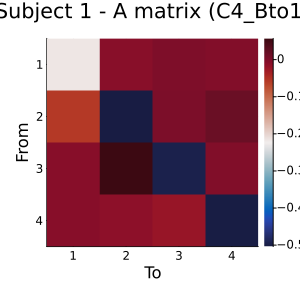

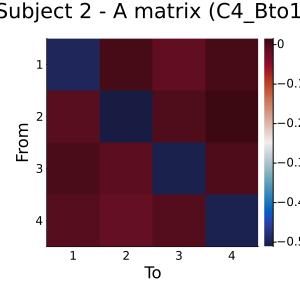

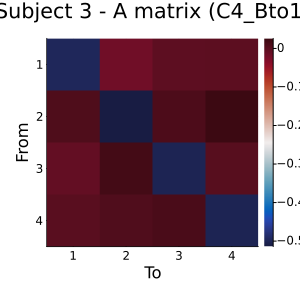

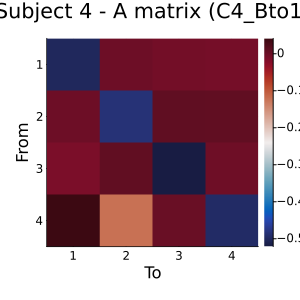

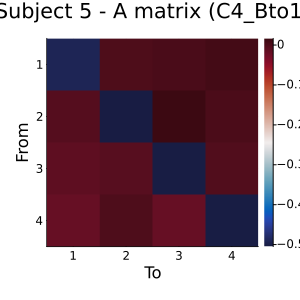

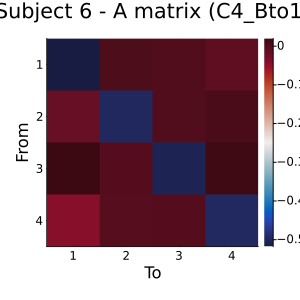

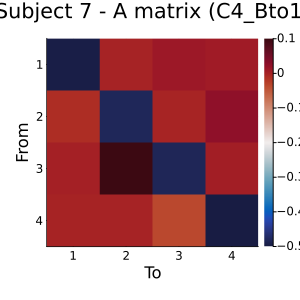

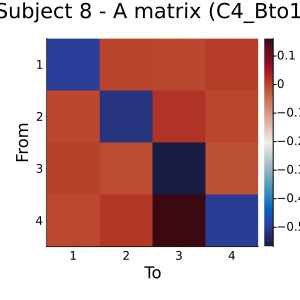

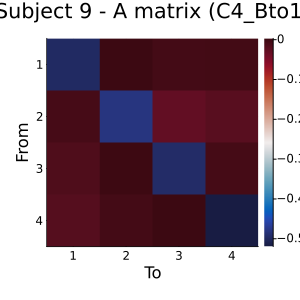

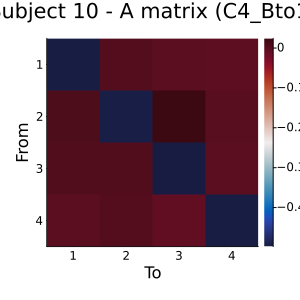

Model: C1_only


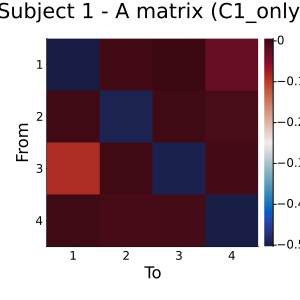

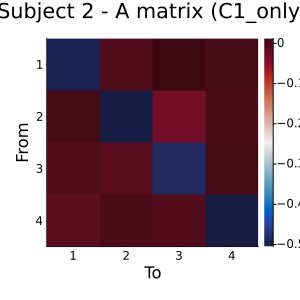

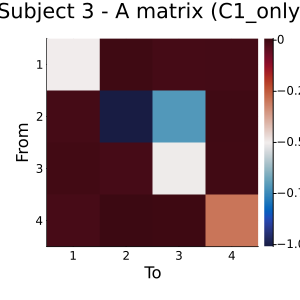

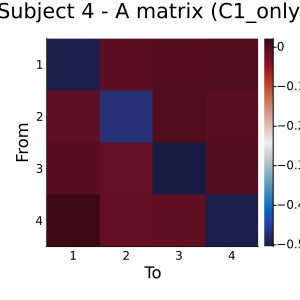

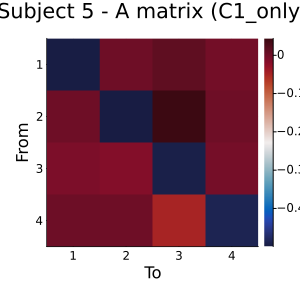

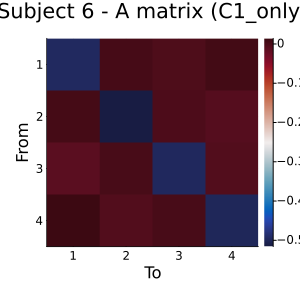

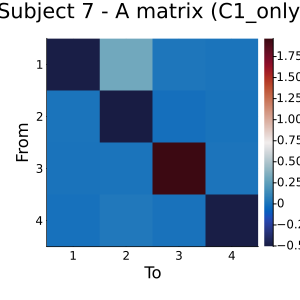

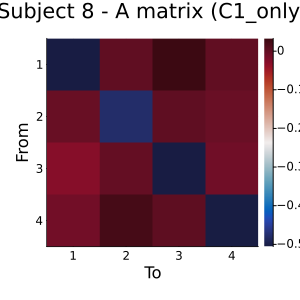

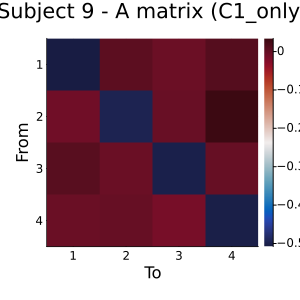

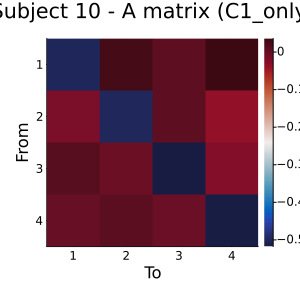

Model: C4_only


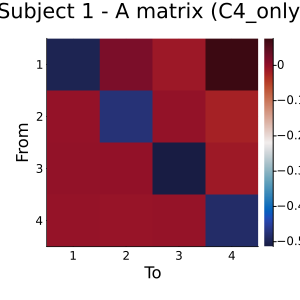

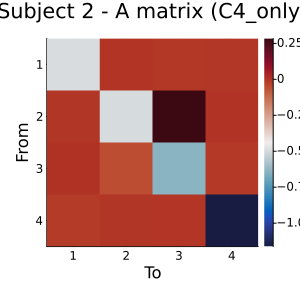

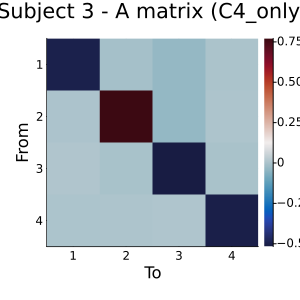

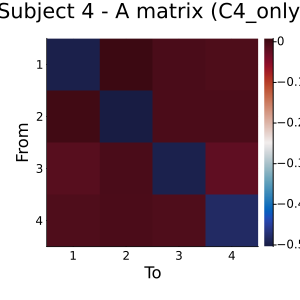

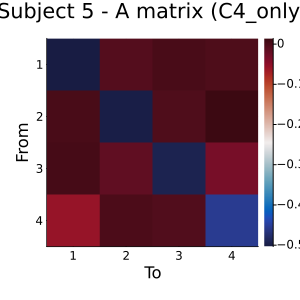

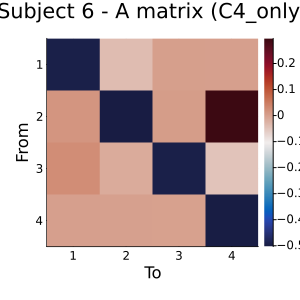

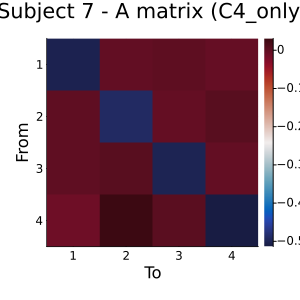

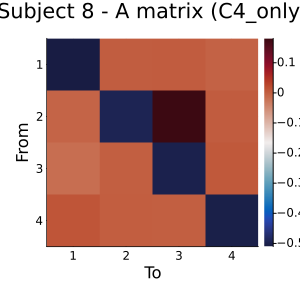

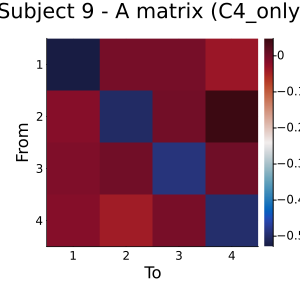

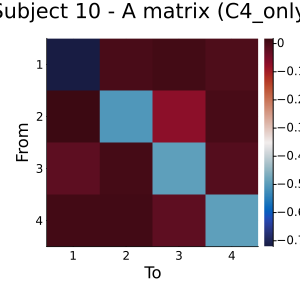

Model: C1_Bto4


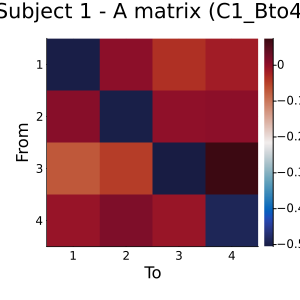

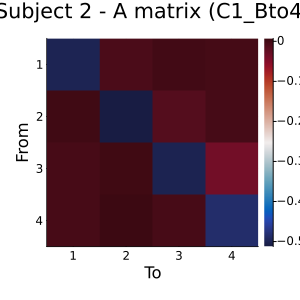

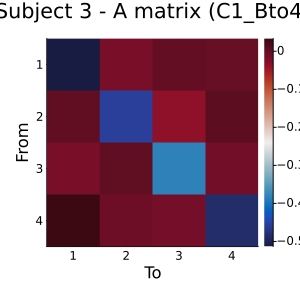

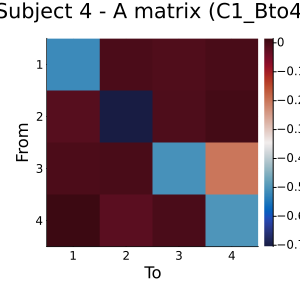

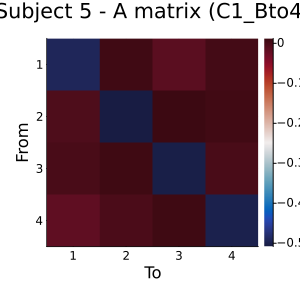

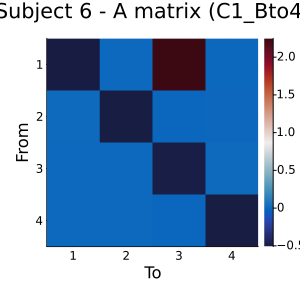

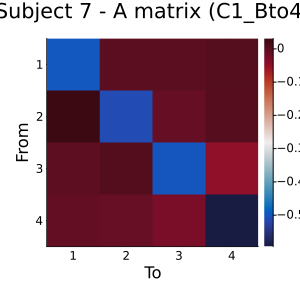

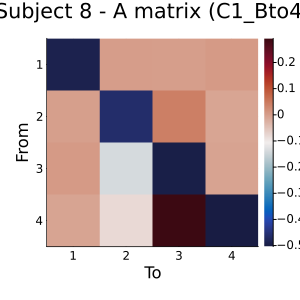

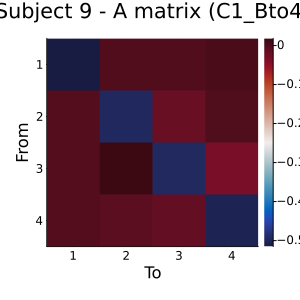

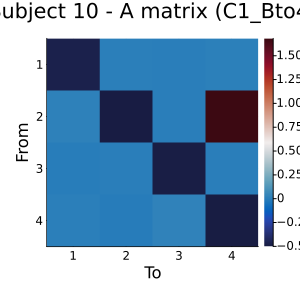

Model: C14_Bbi


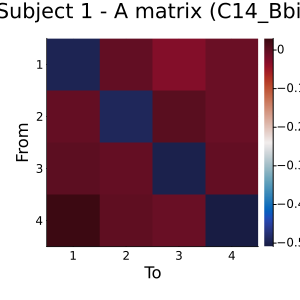

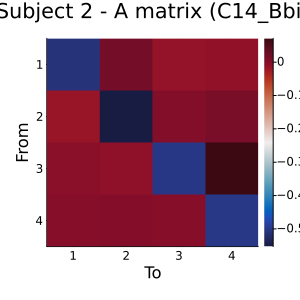

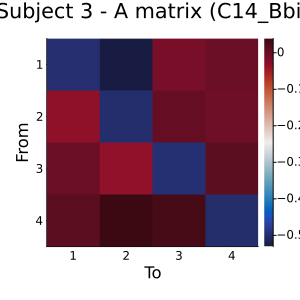

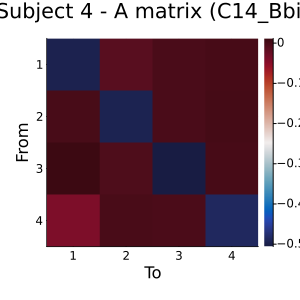

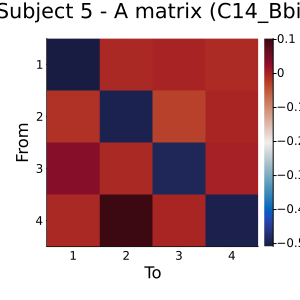

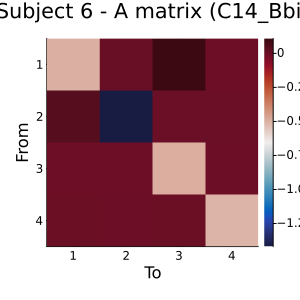

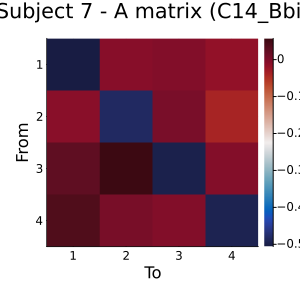

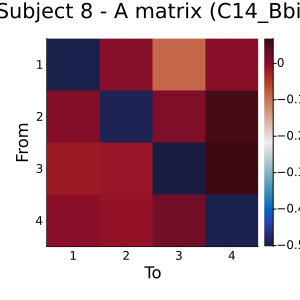

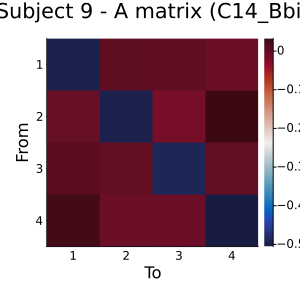

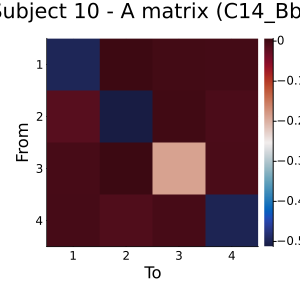

Model: Bto4_only


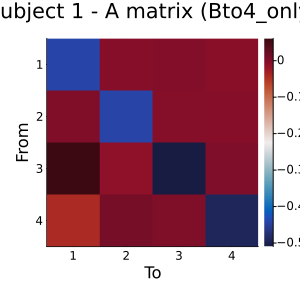

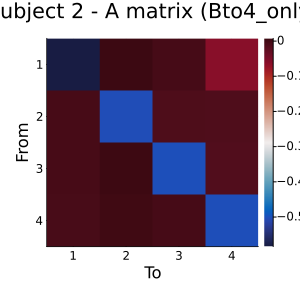

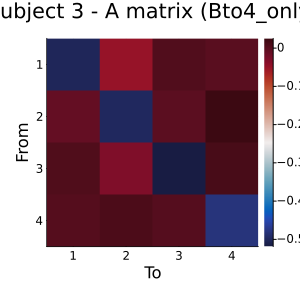

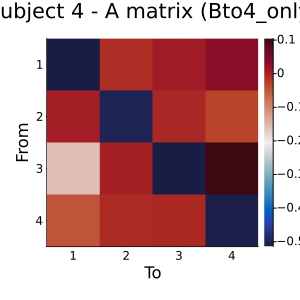

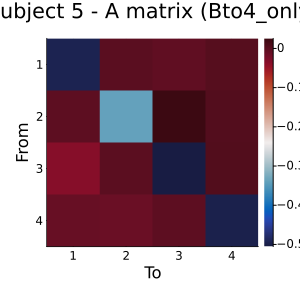

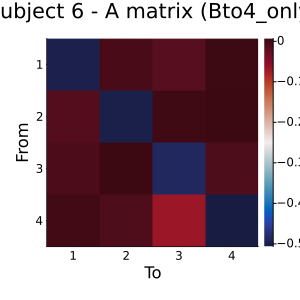

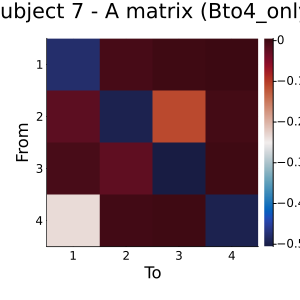

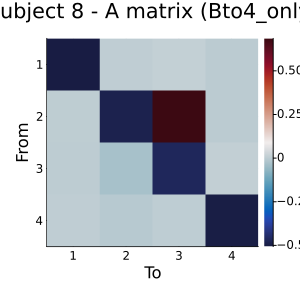

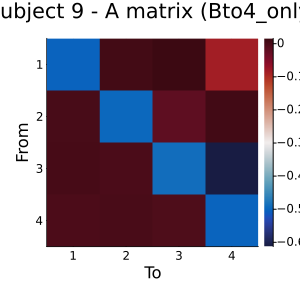

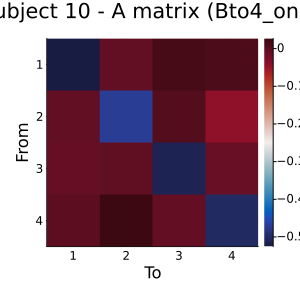

Model: Bto1_only


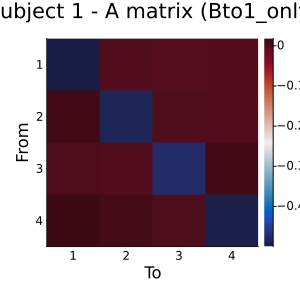

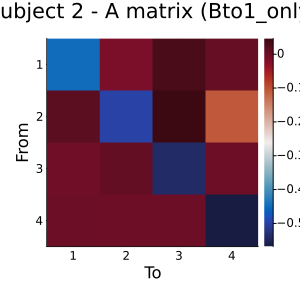

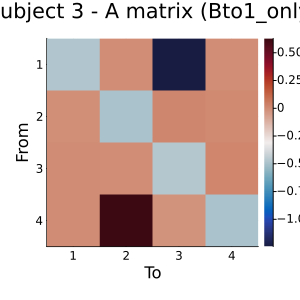

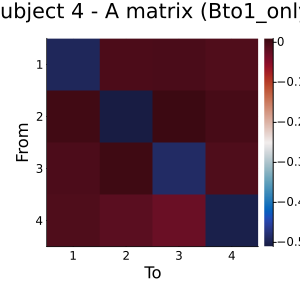

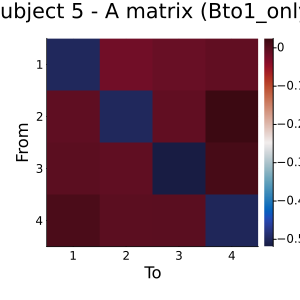

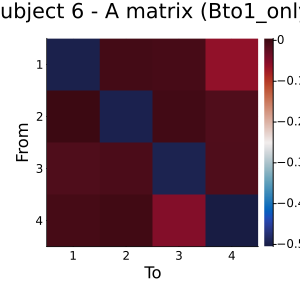

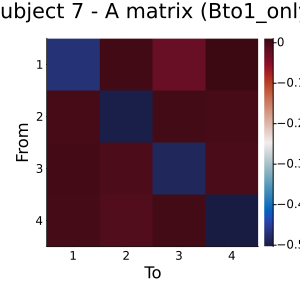

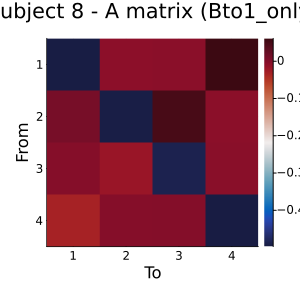

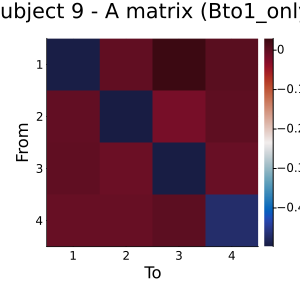

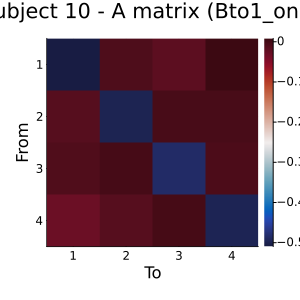

Model: Null


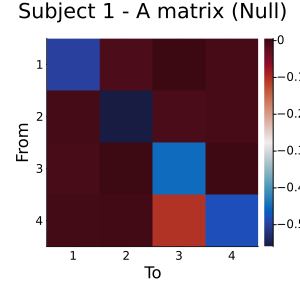

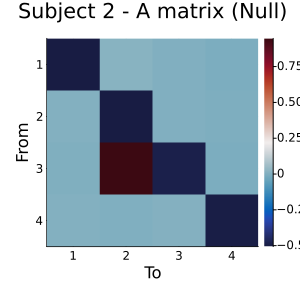

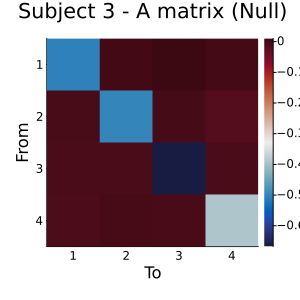

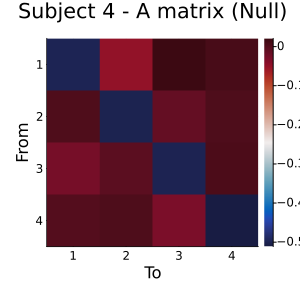

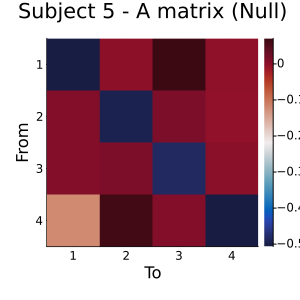

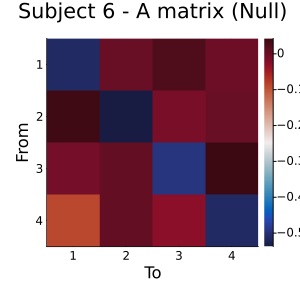

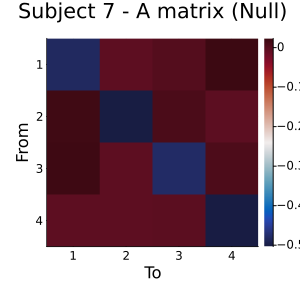

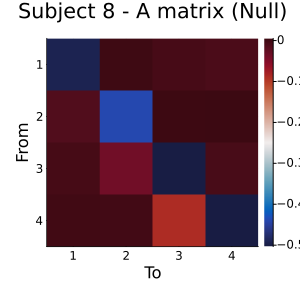

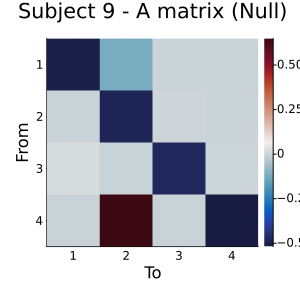

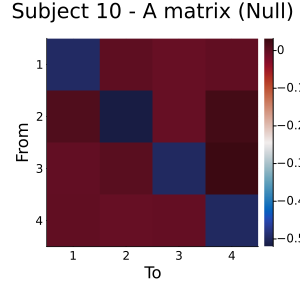

In [65]:
# Visualize A matrices per subject
for model in keys(θ_estimates)
    println("Model: ", model)
    for (i, θ) in enumerate(θ_estimates[model])
        A, _, _, _, _ = VBInfer.unpack_params(θ, n, occursin("B", String(model)))
        A = Float64.(A)
        heatmap(A, title="Subject $i - A matrix ($model)", xlabel="To", ylabel="From", c=:balance, size=(300,300),yflip=true)
        display(current())
    end
end

In [66]:
# Posterior probabilities
posterior_probs = GroupInference.compare_models(free_energies)
println("Posterior model probabilities (rows=subjects, cols=models):\n", posterior_probs)


Posterior model probabilities (rows=subjects, cols=models):
[7.245444643476967e-9 3.7103797347038634e-8 0.003178051325022816 4.4338408698807303e-7 0.9968214608733098 7.78715482632345e-21 4.598440586802164e-13 6.787848986060835e-11; 1.2252199142335528e-88 3.836053863156209e-11 6.87019962799797e-63 0.0 1.1360598820429132e-23 0.9999999999616394 4.786769101118498e-28 3.6259076954796574e-128; 8.422267495760463e-81 7.782323454028193e-98 1.0648910827298592e-153 8.330533564058044e-50 2.298473250377091e-53 1.3103013723646845e-14 4.087162597108302e-222 0.9999999999999869; 0.975494071946731 4.9610800113056815e-54 7.844705741275359e-22 1.807650137656082e-52 1.5480095509392437e-33 4.0279213708424046e-26 8.028671477927617e-19 0.024505928053268927; 5.119636705727706e-93 6.570481144398777e-18 7.59795613624337e-8 1.5102300521877966e-10 0.9746811059224432 5.726319328879756e-11 0.025318817889709275 6.224589372356667e-36; 0.0 5.0774029400214235e-19 4.49291420216577e-40 0.0 4.235066218585121e-98 1.0 2.1524

In [68]:
# Summary: model selection per subject
for i in 1:n_subjects
    best_idx = argmax(posterior_probs[i, :])
    println("Subject $i best model: ", model_names[best_idx])
end

Subject 1 best model: C14_Bbi
Subject 2 best model: Bto4_only
Subject 3 best model: Null
Subject 4 best model: C1_only
Subject 5 best model: C14_Bbi
Subject 6 best model: Bto4_only
Subject 7 best model: C1_only
Subject 8 best model: Bto1_only
Subject 9 best model: C4_Bto1
Subject 10 best model: C4_only


In [69]:
posterior_probs

10×8 Matrix{Float64}:
 7.24544e-9   3.71038e-8   0.00317805    …  4.59844e-13   6.78785e-11
 1.22522e-88  3.83605e-11  6.8702e-63       4.78677e-28   3.62591e-128
 8.42227e-81  7.78232e-98  1.06489e-153     4.08716e-222  1.0
 0.975494     4.96108e-54  7.84471e-22      8.02867e-19   0.0245059
 5.11964e-93  6.57048e-18  7.59796e-8       0.0253188     6.22459e-36
 0.0          5.0774e-19   4.49291e-40   …  2.15246e-18   8.26189e-73
 1.0          0.0          0.0              5.23372e-31   0.0
 5.94818e-12  1.53433e-7   1.39933e-66      1.0           6.89744e-66
 0.0          0.113368     1.23174e-31      4.0723e-9     9.56721e-49
 7.98644e-48  1.0          2.77738e-70      2.49615e-34   7.79397e-31

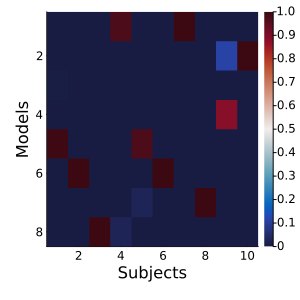

In [70]:
heatmap(posterior_probs', xlabel="Subjects", ylabel="Models", c=:balance, size=(300,300), yflip=true)

In [71]:
avg_posteriors = mean(posterior_probs, dims=1)
best_model_index = argmax(avg_posteriors)

CartesianIndex(1, 6)

In [72]:
println("BEST MODEL (max posterior prob): ",model_names[best_model_index[2]])

BEST MODEL (max posterior prob): Bto4_only


In [73]:
params = θ_estimates[model_names[best_model_index[2]]]
subset = getindex.(params, Ref(1:16))  # returns a vector of 10 vectors of length 16
subset_mat = hcat(subset...)  # dimensions: 16 × 10
A_post_mean = mean(subset_mat,dims=2)
A_post_var = var(subset_mat,dims=2)

16×1 Matrix{Float64}:
 0.001266934033630686
 6.299044766773622e-5
 0.003110136167221434
 0.0053890897087197605
 0.0002638875369410416
 0.0025860243086542087
 0.00023073902040005837
 0.00014204628019418564
 9.200031908695254e-5
 0.04989769064817557
 0.00021371791907369255
 0.0004617657926846981
 0.001238449650673155
 0.000381178253715594
 0.040270129586657565
 6.0521831116168074e-5

In [75]:
A_prior_mean = -0.5I(n)  # enforc

4×4 Diagonal{Float64, Vector{Float64}}:
 -0.5    ⋅     ⋅     ⋅ 
   ⋅   -0.5    ⋅     ⋅ 
   ⋅     ⋅   -0.5    ⋅ 
   ⋅     ⋅     ⋅   -0.5

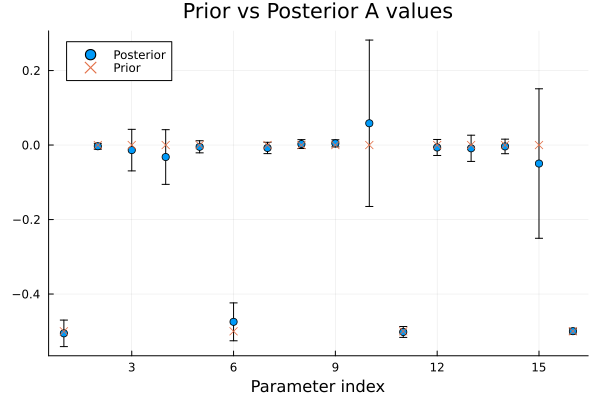

In [77]:
x = 1:(n*n)
plot(x, vec(A_post_mean), yerror=sqrt.(vec(A_post_var)), label="Posterior", seriestype=:scatter)
plot!(x, vec(A_prior_mean), label="Prior", seriestype=:scatter, marker=:x)
title!("Prior vs Posterior A values")
xlabel!("Parameter index")

In [78]:
σ2_prior = 0.01

0.01

In [79]:
μ_post = A_post_mean[7]
σ2_post =  A_post_var[7]
μ_prior = A_prior_mean[7]

0.0

In [80]:
z_scores = (μ_post .- μ_prior) ./ sqrt.(σ2_prior)  # this should be > 2

-0.07820048344049636

In [81]:
variance_ratios = σ2_prior ./ σ2_post  # this should be > 2 

43.339006912059645

In [82]:
KL = 0.5 .* (
    σ2_post ./ σ2_prior .+
    ((μ_post .- μ_prior).^2) ./ σ2_prior .-
    1 .+ log.(σ2_prior ./ σ2_post)
)  # this should be > 0.5

1.3991211498036122

In [83]:
model_names = collect(keys(model_defs))

8-element Vector{Symbol}:
 :C1_only
 :C4_only
 :C1_Bto4
 :C4_Bto1
 :C14_Bbi
 :Bto4_only
 :Bto1_only
 :Null

In [84]:
posterior_probs

10×8 Matrix{Float64}:
 7.24544e-9   3.71038e-8   0.00317805    …  4.59844e-13   6.78785e-11
 1.22522e-88  3.83605e-11  6.8702e-63       4.78677e-28   3.62591e-128
 8.42227e-81  7.78232e-98  1.06489e-153     4.08716e-222  1.0
 0.975494     4.96108e-54  7.84471e-22      8.02867e-19   0.0245059
 5.11964e-93  6.57048e-18  7.59796e-8       0.0253188     6.22459e-36
 0.0          5.0774e-19   4.49291e-40   …  2.15246e-18   8.26189e-73
 1.0          0.0          0.0              5.23372e-31   0.0
 5.94818e-12  1.53433e-7   1.39933e-66      1.0           6.89744e-66
 0.0          0.113368     1.23174e-31      4.0723e-9     9.56721e-49
 7.98644e-48  1.0          2.77738e-70      2.49615e-34   7.79397e-31

## Saving outputs

In [280]:
df_fe = DataFrame(Subject = 1:n_subjects)
for m in model_names
    df_fe[!, Symbol(m)] = free_energies[m]
end
CSV.write("outputs/$test/free_energies.csv", df_fe)

"outputs/Parc4_4blocks2ses_n5/free_energies.csv"

In [295]:
df_params = DataFrame(Subject = 1:n_subjects)
for m in model_names
    df_params[!, Symbol(m)] = θ_estimates[m]
end
CSV.write("outputs/$test/theta_params.csv", df_params)

"outputs/Parc4_4blocks2ses_n5/theta_params.csv"

In [296]:
df_post = DataFrame(Subject = 1:n_subjects)
for (i, m) in enumerate(model_names)
    df_post[!, Symbol(m)] = posterior_probs[:, i]
end
CSV.write("outputs/$test/posterior_probs.csv", df_post)

"outputs/Parc4_4blocks2ses_n5/posterior_probs.csv"

## Reading outpus

In [ ]:
df = CSV.read("outputs/$test/free_energies.csv", DataFrame)
free_energies = Dict(col => df[!, col] for col in names(df))

df = CSV.read("outputs/$test/theta_params.csv", DataFrame)
θ_estimates = Dict(col => df[!, col] for col in names(df))

df = CSV.read("outputs/$test/posterior_probs.csv", DataFrame)
posterior_probs = Dict(col => df[!, col] for col in names(df))


In [294]:
θ_estimates

Dict{Symbol, Vector{Any}} with 8 entries:
  :C4_Bto1   => [-37906.8, -37846.9, -37381.5, -37000.6, -25834.4, -33570.4, -4…
  :C1_only   => [-37796.2, -37884.5, -37517.6, -36878.3, -25856.6, -33548.4, -4…
  :C4_only   => [-37765.5, -38155.9, -37600.0, -36985.9, -27007.9, -33547.5, -4…
  :C1_Bto4   => [-37812.8, -37897.7, -37499.9, -37017.8, -25783.1, -33511.9, -4…
  :C14_Bbi   => [-38616.3, -37795.3, -37464.9, -37383.6, -25913.4, -33471.4, -4…
  :Bto4_only => [-37781.5, -37903.7, -37460.6, -36888.7, -25864.9, -33503.6, -4…
  :Bto1_only => [-37819.2, -38119.7, -37536.8, -36969.2, -25856.9, -33575.2, -4…
  :Null      => [-37772.8, -37891.2, -38173.3, -36961.3, -25793.1, -33532.4, -4…

In [309]:
best_params = Dict()

for i in 1:n_subjects
    best_idx = argmax(posterior_probs[i, :])
    best_model = model_names[best_idx]
    θ = θ_estimates[best_model][i]
    A, B, C, τ, α = VBInfer.unpack_params(θ, n, best_model in [:C1_Bto4, :C4_Bto1, :C14_Bbi])
    best_params["subject_$i"] = Dict(
        "model" => String(best_model),
        "A" => A,
        "B" => B,
        "C" => C,
        "tau" => τ,
        "alpha" => α
    )
end

open("best_model_params.json", "w") do io
    JSON.print(io, best_params)
end

## After choosing the model, perform PEB + BMR

In [85]:
best_thetas = [
    θ_estimates[model_names[argmax(posterior_probs[i, :])]][i]
    for i in 1:n_subjects
]
θs = hcat(best_thetas...)'  # size: (n_subjects, n_params)


10×44 adjoint(::Matrix{Float64}) with eltype Float64:
 -0.497739  -0.00289329   0.00347147   …  0.320182  0.330109   0.337709
 -0.583923  -0.00210377  -0.00221923      0.420067  0.329109   0.331048
 -0.508181  -0.00167475  -0.00320291      0.327941  0.334466   0.326745
 -0.498618  -0.00657549   0.000865183     0.329195  0.337129   0.366771
 -0.508657  -0.0131262    0.0348325       0.324183  0.327974   0.343151
 -0.500108  -0.0117541   -0.0066852    …  0.336735  0.335736   0.334541
 -0.496116   0.00486662   0.00274026      0.303108  0.282858   0.342277
 -0.496052   0.0116101    0.000362213     0.324567  0.326218   0.217597
 -0.499289  -0.00499264  -0.0122916       0.330972  0.18363   -1.82302
 -0.720557   0.0182563   -0.0184825       0.350359  0.33705    0.354565

In [86]:
size(θs)

(10, 44)

In [87]:
print_current_time()


Current time: 23:14:50


In [88]:
# Group-level PEB  on best model (e.g. :C_and_B)
μ, σ² = GroupInference.run_peb(θs)

keep_mask = σ²[:] .> 1e-6
μ_filtered = μ[keep_mask]
σ²_filtered = σ²[keep_mask]
labels_filtered = labels[keep_mask]

44-element Vector{String}:
 "A11"
 "A21"
 "A31"
 "A41"
 "A12"
 "A22"
 "A32"
 "A42"
 "A13"
 "A23"
 "A33"
 "A43"
 "A14"
 ⋮
 "C1"
 "C2"
 "C3"
 "C4"
 "tau1"
 "tau2"
 "tau3"
 "tau4"
 "alpha1"
 "alpha2"
 "alpha3"
 "alpha4"

In [470]:
# Group-level : BMR on best model (e.g. :C_and_B)
best_mask = GroupInference.run_bmr_greedy(μ_filtered, σ²_filtered, labels_filtered,λ=1e-2)

Initial Free Energy: -19018.501453722336
Step 1: Removing param tau4 → FE improved to -12779.111765937523
Step 2: Removing param tau2 → FE improved to -8293.391254833266
Step 3: Removing param tau3 → FE improved to -4348.361939895993
Step 4: Removing param alpha2 → FE improved to -2767.447431958221
Step 5: Removing param A11 → FE improved to -1944.8026827258116
Step 6: Removing param A44 → FE improved to -1414.4442233124028
Step 7: Removing param alpha3 → FE improved to -889.3536872667149
Step 8: Removing param alpha4 → FE improved to -469.54891238126646
Step 9: Removing param A22 → FE improved to -134.03942975617844
Step 10: Removing param A33 → FE improved to 39.520907625836394


44-element BitVector:
 0
 1
 1
 1
 1
 0
 1
 1
 1
 1
 0
 1
 1
 ⋮
 1
 1
 1
 1
 1
 0
 0
 0
 1
 0
 0
 0

In [471]:
# best_mask = GroupInference.run_bmr(μ_filtered, σ²_filtered, labels_filtered)

In [472]:
println("Retained parameters: ", labels[findall(best_mask)])


Retained parameters: ["A21", "A31", "A41", "A12", "A32", "A42", "A13", "A23", "A43", "A14", "A24", "A34", "B11", "B21", "B31", "B41", "B12", "B22", "B32", "B42", "B13", "B23", "B33", "B43", "B14", "B24", "B34", "B44", "C1", "C2", "C3", "C4", "tau1", "alpha1"]


In [473]:
println("Retained parameters (BMR):")
for (i, keep) in enumerate(best_mask)
    if keep
        println("✓ ", labels[i])
    end
end

Retained parameters (BMR):
✓ A21
✓ A31
✓ A41
✓ A12
✓ A32
✓ A42
✓ A13
✓ A23
✓ A43
✓ A14
✓ A24
✓ A34
✓ B11
✓ B21
✓ B31
✓ B41
✓ B12
✓ B22
✓ B32
✓ B42
✓ B13
✓ B23
✓ B33
✓ B43
✓ B14
✓ B24
✓ B34
✓ B44
✓ C1
✓ C2
✓ C3
✓ C4
✓ tau1
✓ alpha1


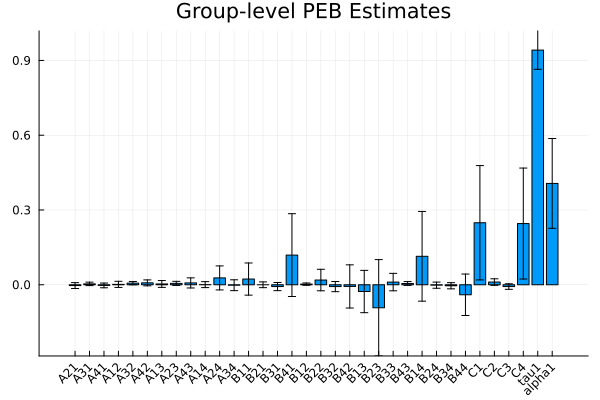

In [474]:
μ = μ[:]
σ = sqrt.(σ²[:])
bar(labels[best_mask], μ[best_mask]; yerror=σ[best_mask], title="Group-level PEB Estimates", legend=false, xticks=:all, xrotation=45)

In [332]:
μ[1:16]

16-element Vector{Float64}:
 -0.5009027352357837
  0.016318651504128152
 -9.485118834853079e-5
  0.0001961938044965244
  0.003011165558236674
 -0.5003418724623748
  0.01731286628966141
 -0.002342364444221412
  0.003370586185768442
 -0.002798661581725768
 -0.5109816393289085
  0.002025821473155638
  0.0026723201922534564
 -0.0008735569610735592
 -0.0015177619702733374
 -0.5000156524191798

In [319]:
# Visualize retained parameters after BMR
# function plot_bmr_retained(μ::Vector{Float64}, σ²::Vector{Float64}, labels::Vector{String}, mask::BitVector)
#     retained_labels = labels[mask]
#     retained_means = μ[mask]
#     retained_se = sqrt.(σ²[mask])
#     bar(retained_labels, retained_means, yerr=retained_se, legend=false, title="BMR Retained Parameters", xlabel="Parameter", ylabel="Value", rotation=45)
# end

# Generate group level results

In [320]:
module PlotUtils
    using Plots

    export plot_group_means, plot_matrix_heatmap

    function plot_group_means(μ::Vector{Float64}, σ²::Vector{Float64}, labels::Vector{String})
        se = sqrt.(σ²)

        bar(labels, μ, yerr=se, legend=false,
        title="Group-Level Parameter Estimates",
        xlabel="Parameter", ylabel="Value",
        xticks=(1:length(labels), labels),  # ✅ CORRECT form
        rotation=45, size=(1000, 400))

        # bar(labels, μ, yerr=se, legend=false, title="Group-Level Parameter Estimates",
        #     xlabel="Parameter", ylabel="Value", xticks=labels, rotation=45, size=(1000, 400))
    end

    function plot_matrix_heatmap(mat::Matrix{Float64}, title_str::String)
    heatmap(
        mat,
        c=:balance,
        #clim=(-0.1,0.3),
        title=title_str,
        xlabel="From",
        ylabel="To",
        size=(400, 400),
        yflip=true       # ✅ this makes row 1 appear on top
    )
end
end

Main.PlotUtils

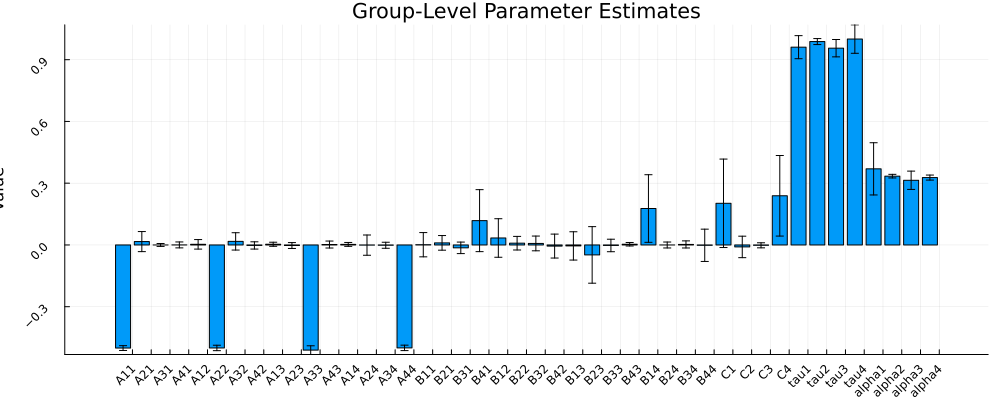

In [321]:
using .PlotUtils
PlotUtils.plot_group_means(μ[:], σ²[:], labels)

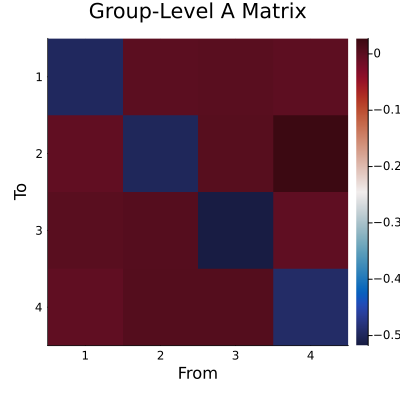

In [475]:
A, B, C, τ, α = VBInfer.unpack_params(μ[:], n, true)
PlotUtils.plot_matrix_heatmap(A, "Group-Level A Matrix",)


In [325]:
A

4×4 Matrix{Float64}:
 -0.500903      0.00301117   0.00337059   0.00267232
  0.0163187    -0.500342    -0.00279866  -0.000873557
 -9.48512e-5    0.0173129   -0.510982    -0.00151776
  0.000196194  -0.00234236   0.00202582  -0.500016

In [326]:
npzwrite("outputs/$test/A_group.npy", A)

In [476]:
B

4×4 Matrix{Float64}:
  0.0227815     0.00244543  -0.0272181    0.11409
 -0.000161617   0.0188731   -0.0924621   -0.00178319
 -0.00734054   -0.00737697   0.0106782   -0.00408291
  0.118941     -0.00678935   0.00501367  -0.0402938

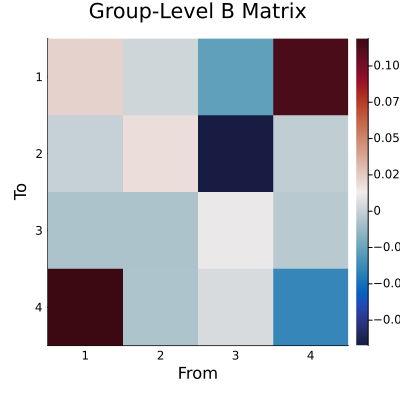

In [477]:
PlotUtils.plot_matrix_heatmap(B, "Group-Level B Matrix")

In [334]:
npzwrite("outputs/$test/B_group.npy", B)

# Using all embodiment blocks of session 1 

In [520]:
### FORMAT
# Y_subj = [y1, y2, ..., y5], each a (T, R) matrix of fMRI signals
# task_input = [0, 0, 1, 1, ..., 0]

parc = "Parc4_ses1"  # full: Parc8_2emb  2 sessions
                     # Parc4 for the 2 SC + 2 SM
                     # Parc4_ses1_2emb for for the 1 session only 2 embodiments 
                     # Parc4_ses1 has the full paradigm with all embodiments blocks

test = "Parc4_all-blocks_ses1_n10" # USED: Parc4_4blocks2ses_n10, Parc4_all-blocks_ses1_n10

                            # others Parc4_2blocks1ses_n5

y1 = npzread("/media/RCPNAS/Data3/Ilaria/TS_data/brain_spine_E_dcm/$parc/sub-1.npy")';
y2 = npzread("/media/RCPNAS/Data3/Ilaria/TS_data/brain_spine_E_dcm/$parc/sub-2.npy")';
y3 = npzread("/media/RCPNAS/Data3/Ilaria/TS_data/brain_spine_E_dcm/$parc/sub-3.npy")';
y4 = npzread("/media/RCPNAS/Data3/Ilaria/TS_data/brain_spine_E_dcm/$parc/sub-4.npy")';
y5 = npzread("/media/RCPNAS/Data3/Ilaria/TS_data/brain_spine_E_dcm/$parc/sub-5.npy")';
y6 = npzread("/media/RCPNAS/Data3/Ilaria/TS_data/brain_spine_E_dcm/$parc/sub-6.npy")';
y7 = npzread("/media/RCPNAS/Data3/Ilaria/TS_data/brain_spine_E_dcm/$parc/sub-7.npy")';
y8 = npzread("/media/RCPNAS/Data3/Ilaria/TS_data/brain_spine_E_dcm/$parc/sub-8.npy")';
y9 = npzread("/media/RCPNAS/Data3/Ilaria/TS_data/brain_spine_E_dcm/$parc/sub-9.npy")';
y10 = npzread("/media/RCPNAS/Data3/Ilaria/TS_data/brain_spine_E_dcm/$parc/sub-10.npy")';


Y_subj = [y1, y2, y3, y4, y5, y6, y7, y8, y9, y10];

task1 = npzread("/media/RCPNAS/Data3/Ilaria/TS_data/brain_spine_E_dcm/$parc/task/sub-1_task_vec.npy");
task2 = npzread("/media/RCPNAS/Data3/Ilaria/TS_data/brain_spine_E_dcm/$parc/task/sub-2_task_vec.npy");
task3 = npzread("/media/RCPNAS/Data3/Ilaria/TS_data/brain_spine_E_dcm/$parc/task/sub-3_task_vec.npy");
task4 = npzread("/media/RCPNAS/Data3/Ilaria/TS_data/brain_spine_E_dcm/$parc/task/sub-4_task_vec.npy");
task5 = npzread("/media/RCPNAS/Data3/Ilaria/TS_data/brain_spine_E_dcm/$parc/task/sub-5_task_vec.npy");
task6 = npzread("/media/RCPNAS/Data3/Ilaria/TS_data/brain_spine_E_dcm/$parc/task/sub-6_task_vec.npy");
task7 = npzread("/media/RCPNAS/Data3/Ilaria/TS_data/brain_spine_E_dcm/$parc/task/sub-7_task_vec.npy");
task8 = npzread("/media/RCPNAS/Data3/Ilaria/TS_data/brain_spine_E_dcm/$parc/task/sub-8_task_vec.npy");
task9 = npzread("/media/RCPNAS/Data3/Ilaria/TS_data/brain_spine_E_dcm/$parc/task/sub-9_task_vec.npy");
task10 = npzread("/media/RCPNAS/Data3/Ilaria/TS_data/brain_spine_E_dcm/$parc/task/sub-10_task_vec.npy");

task_inputs = [task1, task2, task3, task4, task5, task6, task7, task8, task9, task10];  # each is a vector

In [521]:
n = 4
n_subjects = length(Y_subj)
TR = 1.55

labels = [ "A$(i)$(j)" for i in 1:n, j in 1:n ] |> vec
append!(labels, [ "B$(i)$(j)" for i in 1:n, j in 1:n ] |> vec)
append!(labels, ["C$i" for i in 1:n])
append!(labels, ["tau$i" for i in 1:n])
append!(labels, ["alpha$i" for i in 1:n])

44-element Vector{String}:
 "A11"
 "A21"
 "A31"
 "A41"
 "A12"
 "A22"
 "A32"
 "A42"
 "A13"
 "A23"
 "A33"
 "A43"
 "A14"
 ⋮
 "C1"
 "C2"
 "C3"
 "C4"
 "tau1"
 "tau2"
 "tau3"
 "tau4"
 "alpha1"
 "alpha2"
 "alpha3"
 "alpha4"

In [548]:
boost_prior = 0.1

model_defs = OrderedDict(
    :C1_only        => begin C = zeros(n); C[1] = 0.2+boost_prior; (C, zeros(n, n), false) end,
    :C4_only        => begin C = zeros(n); C[4] = 0.2+boost_prior; (C, zeros(n, n), false) end,
    :C1_Bto4        => begin C = zeros(n); C[1] = 0.2+boost_prior; B = zeros(n, n); B[4, 1] = 0.1+boost_prior; (C, B, true) end,
    :C4_Bto1        => begin C = zeros(n); C[4] = 0.2+boost_prior; B = zeros(n, n); B[1, 4] = 0.1+boost_prior; (C, B, true) end,
    :C14_Bbi        => begin C = zeros(n); C[1] = 0.2+boost_prior; C[4] = 0.2+boost_prior; B = zeros(n, n); B[1, 4] = 0.1+boost_prior; B[4, 1] = 0.1+boost_prior; (C, B, true) end,
    :Bto4_only      => begin C = zeros(n); B = zeros(n, n); B[4, 1] = 0.1+boost_prior; (C, B, true) end,
    :Bto1_only      => begin C = zeros(n); B = zeros(n, n); B[1, 4] = 0.1+boost_prior; (C, B, true) end,
    :Null           => (zeros(n), zeros(n, n), false)
)

OrderedDict{Symbol, Tuple{Vector{Float64}, Matrix{Float64}, Bool}} with 8 entries:
  :C1_only   => ([0.4, 0.0, 0.0, 0.0], [0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0…
  :C4_only   => ([0.0, 0.0, 0.0, 0.4], [0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0…
  :C1_Bto4   => ([0.4, 0.0, 0.0, 0.0], [0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0…
  :C4_Bto1   => ([0.0, 0.0, 0.0, 0.4], [0.0 0.0 0.0 0.3; 0.0 0.0 0.0 0.0; 0.0 0…
  :C14_Bbi   => ([0.4, 0.0, 0.0, 0.4], [0.0 0.0 0.0 0.3; 0.0 0.0 0.0 0.0; 0.0 0…
  :Bto4_only => ([0.0, 0.0, 0.0, 0.0], [0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0…
  :Bto1_only => ([0.0, 0.0, 0.0, 0.0], [0.0 0.0 0.0 0.3; 0.0 0.0 0.0 0.0; 0.0 0…
  :Null      => ([0.0, 0.0, 0.0, 0.0], [0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0…

In [549]:
θ_estimates = Dict(model => [] for model in keys(model_defs))
θ_estimates_var = Dict(model => [] for model in keys(model_defs))
free_energies = Dict(model => [] for model in keys(model_defs))

Dict{Symbol, Vector{Any}} with 8 entries:
  :C4_Bto1   => []
  :C1_only   => []
  :C4_only   => []
  :C1_Bto4   => []
  :C14_Bbi   => []
  :Bto4_only => []
  :Bto1_only => []
  :Null      => []

In [550]:
model_names = collect(keys(model_defs))


8-element Vector{Symbol}:
 :C1_only
 :C4_only
 :C1_Bto4
 :C4_Bto1
 :C14_Bbi
 :Bto4_only
 :Bto1_only
 :Null

In [551]:
n_repeats = 5 #10

for i in 1:n_subjects
    @show i
    y_obs = Y_subj[i]
    task = task_inputs[i]
    T = size(y_obs, 1)
    tvec = collect(0:TR:(T-1)*TR)
    u_func = DCMRealData.make_input_function(task, tvec)
    predict_func = (params, t) -> DCMRealData.simulate_dcm(params, t)

    for (model, (C, B, use_B)) in model_defs
        @show model
        # init list of subject-estimates per iteration
        θs = Float64[] 
        Fs = Float64[]  
        for r in 1:n_repeats
            @show r
            θ0 = VBInfer.create_theta0(n, C, B)
            θ, F = VBInfer.vb_infer(θ0, y_obs, tvec, n, u_func, use_B; predict_func=predict_func,prior_var=0.01)
            append!(θs, θ)
            push!(Fs, F)
        end
        
        #θ0 = VBInfer.create_theta0(n, C, B)
        #θ, F = VBInfer.vb_infer(θ0, y_obs, tvec, n, u_func, use_B; predict_func=predict_func)
        
        θ_mat = reshape(θs, :, n_repeats)'  # shape (n_repeats, n_params)
        θ_avg = mean(θ_mat, dims=1)[:]      # mean θ across repeats
        F_avg = mean(Fs)                    # mean free energy
        θ_var = var(θ_mat, dims=1)[:]
        
        # push!(θ_estimates[model], θ)
        # push!(free_energies[model], F)
        push!(θ_estimates[model], θ_avg)
        push!(θ_estimates_var[model], θ_var)
        push!(free_energies[model], F_avg)
        
    end
end

i = 1
model = :C1_only
r = 1
r = 2
r = 3
r = 4
r = 5
model = :C4_only
r = 1
r = 2
r = 3
r = 4
r = 5
model = :C1_Bto4
r = 1
r = 2
r = 3
r = 4
r = 5
model = :C4_Bto1
r = 1
r = 2
r = 3
r = 4
r = 5
model = :C14_Bbi
r = 1
r = 2
r = 3
r = 4
r = 5
model = :Bto4_only
r = 1
r = 2
r = 3
r = 4
r = 5
model = :Bto1_only
r = 1
r = 2
r = 3
r = 4
r = 5
model = :Null
r = 1
r = 2
r = 3
r = 4
r = 5
i = 2
model = :C1_only
r = 1
r = 2
r = 3
r = 4
r = 5
model = :C4_only
r = 1
r = 2
r = 3
r = 4
r = 5
model = :C1_Bto4
r = 1
r = 2
r = 3
r = 4
r = 5
model = :C4_Bto1
r = 1
r = 2
r = 3
r = 4
r = 5
model = :C14_Bbi
r = 1
r = 2
r = 3
r = 4
r = 5
model = :Bto4_only
r = 1
r = 2
r = 3
r = 4
r = 5
model = :Bto1_only
r = 1
r = 2
r = 3
r = 4
r = 5
model = :Null
r = 1
r = 2
r = 3
r = 4
r = 5
i = 3
model = :C1_only
r = 1
r = 2
r = 3
r = 4
r = 5
model = :C4_only
r = 1
r = 2
r = 3
r = 4
r = 5
model = :C1_Bto4
r = 1
r = 2
r = 3
r = 4
r = 5
model = :C4_Bto1
r = 1
r = 2
r = 3
r = 4
r = 5
model = :C14_Bbi
r = 1
r = 2
r = 3
r = 4

In [552]:
θ_estimates_var

Dict{Symbol, Vector{Any}} with 8 entries:
  :C4_Bto1   => [[5.12613e-5, 0.0315085, 5.56631e-5, 0.000101192, 0.00431113, 4…
  :C1_only   => [[0.0446115, 0.000182506, 9.78679e-5, 4.31157e-5, 0.000616706, …
  :C4_only   => [[0.000142867, 0.00206009, 0.000704358, 4.78095e-5, 0.000400383…
  :C1_Bto4   => [[8.98246e-6, 0.000104204, 6.08479e-5, 0.000448589, 3.09783e-6,…
  :C14_Bbi   => [[6.52769e-5, 9.38531, 0.00111394, 0.000409892, 0.00344777, 0.0…
  :Bto4_only => [[2.79467e-5, 5.02705e-5, 0.000249388, 9.09705e-5, 0.00206326, …
  :Bto1_only => [[0.00013186, 0.0011562, 1.98517e-5, 0.000101727, 0.00491926, 0…
  :Null      => [[0.00106602, 0.000548233, 0.00236021, 0.152151, 6.03383e-5, 4.…

In [527]:
free_energies

Dict{Symbol, Vector{Any}} with 8 entries:
  :C4_Bto1   => [-64138.8, -81415.6, -72034.2, -70022.7, -67503.3, -56755.3, -8…
  :C1_only   => [-64226.5, -81364.3, -72152.4, -69972.7, -67391.7, -56775.3, -8…
  :C4_only   => [-65686.0, -81428.8, -72266.7, -70075.3, -67573.1, -56641.2, -8…
  :C1_Bto4   => [-64040.4, -81440.0, -72071.6, -70123.1, -67316.2, -56987.9, -8…
  :C14_Bbi   => [-64047.2, -81351.3, -72043.1, -70321.7, -67733.2, -56787.8, -8…
  :Bto4_only => [-64071.4, -81462.8, -72182.5, -69931.8, -67603.0, -56490.0, -8…
  :Bto1_only => [-65807.4, -81783.7, -72407.1, -70056.3, -67721.6, -56579.6, -8…
  :Null      => [-64136.9, -81599.1, -72007.0, -70028.5, -67360.3, -56761.7, -8…

In [556]:
A, B, C, τ, α  = VBInfer.unpack_params(θ_estimates[:C1_only][6], n, occursin("B", String(:C1_only)))

([-0.5092644577724904 -0.0022946392705824772 0.00528484925155302 -0.015532392288290675; 0.016832192365566163 -0.5086907157247932 0.002347366637051874 -0.059949451159241995; -0.0026062589611247533 0.005681567410481522 -0.5061297060859442 0.003165149309820095; -0.0005534919633021942 0.015037209842517682 0.0014904361618626213 -0.4915857235275219], [0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0], [-0.0006789088864504154, -0.0026871198746148497, -0.002125915626352541, -0.0009087293206751018], [-0.0026316881655778354, 0.0007409493472165294, -0.0015303808951104701, -0.0014182886355079932], [-0.003029576896132888, 0.014535168310088751, 0.009883793495138144, 0.022882971034250094])

Model: C4_Bto1


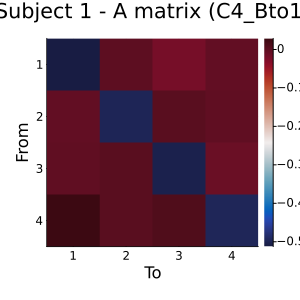

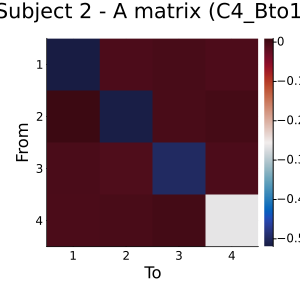

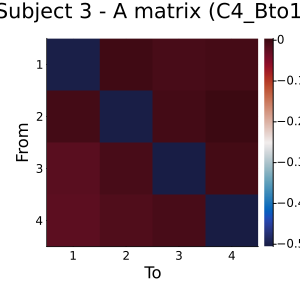

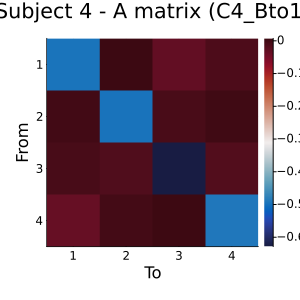

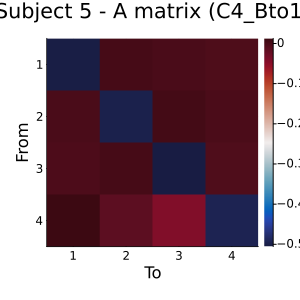

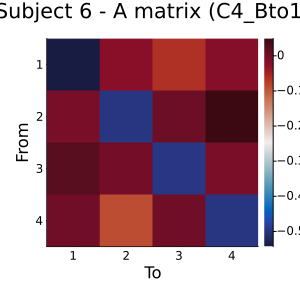

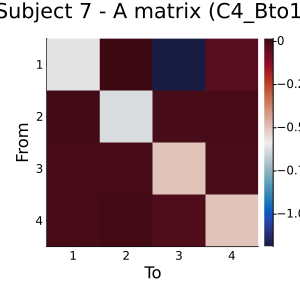

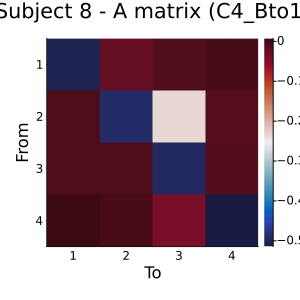

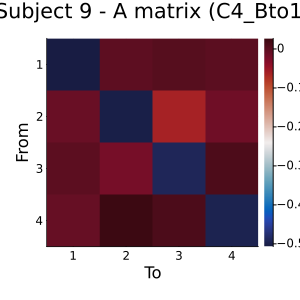

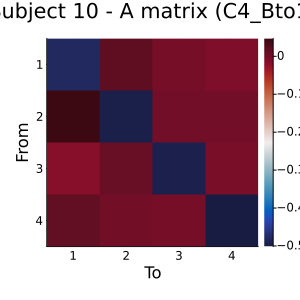

Model: C1_only


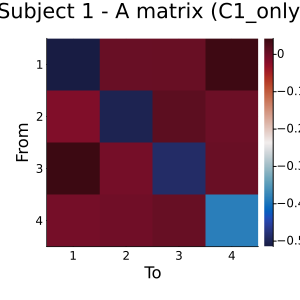

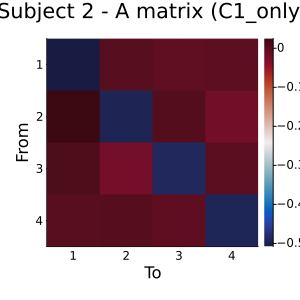

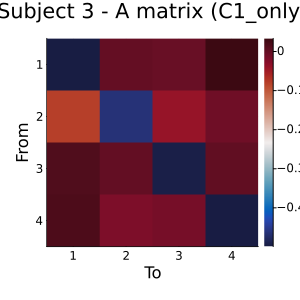

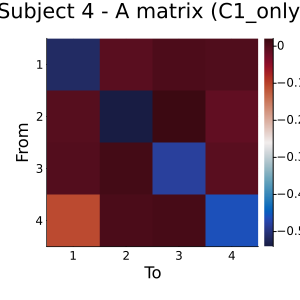

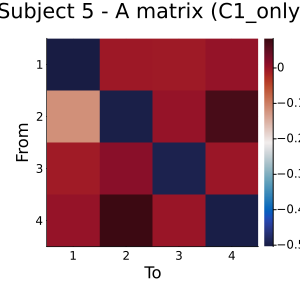

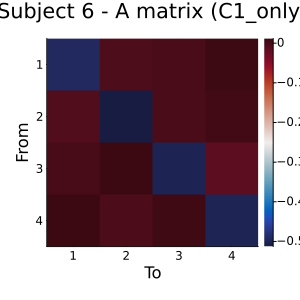

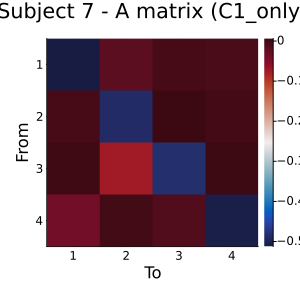

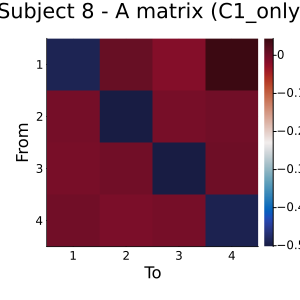

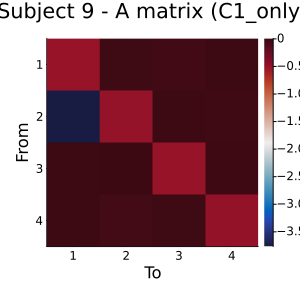

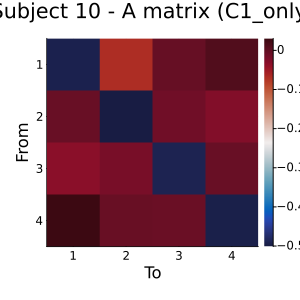

Model: C4_only


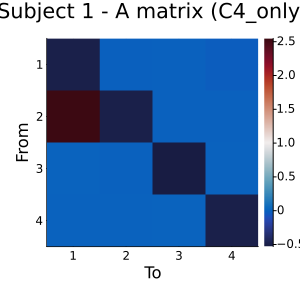

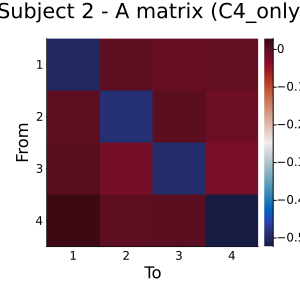

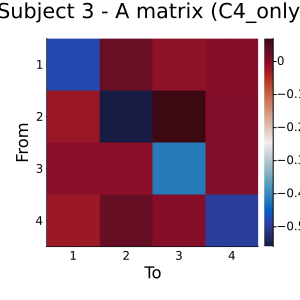

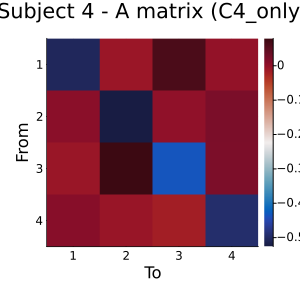

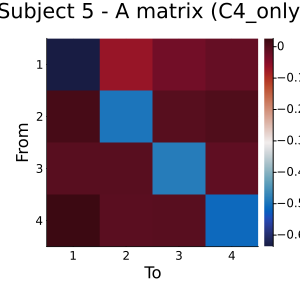

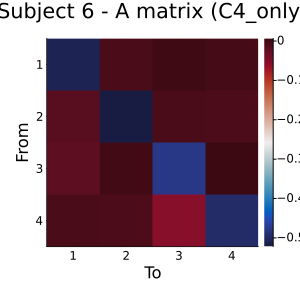

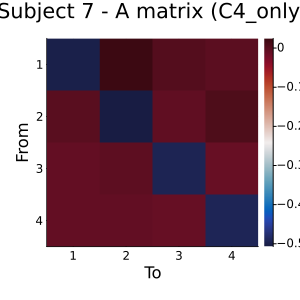

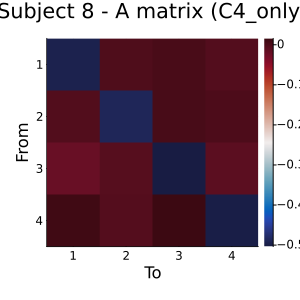

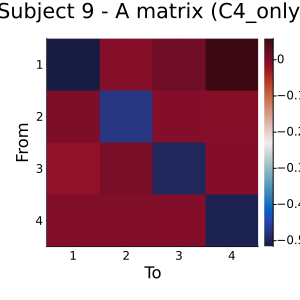

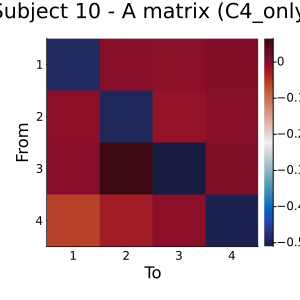

Model: C1_Bto4


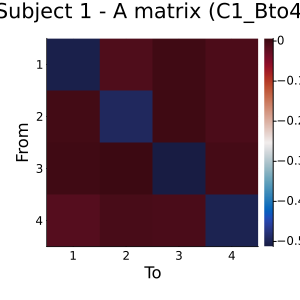

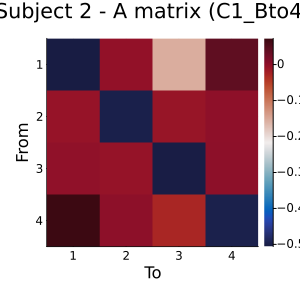

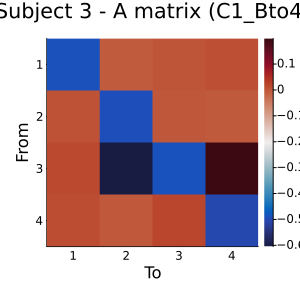

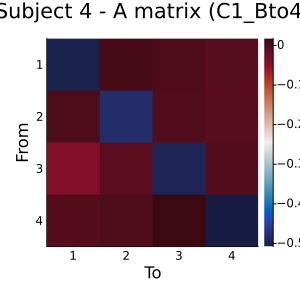

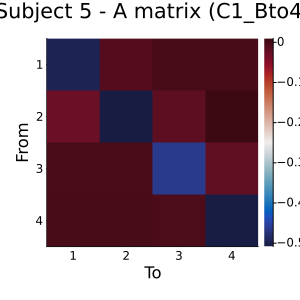

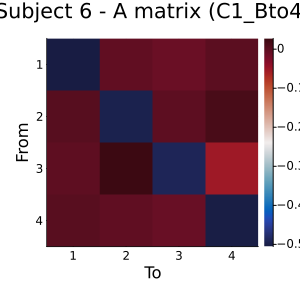

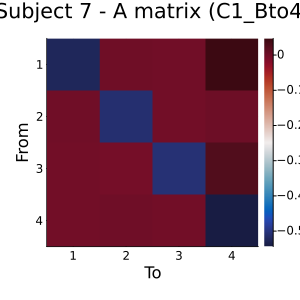

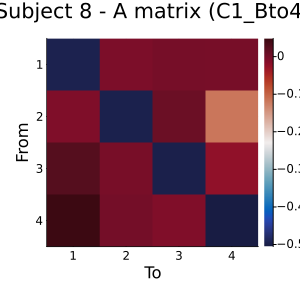

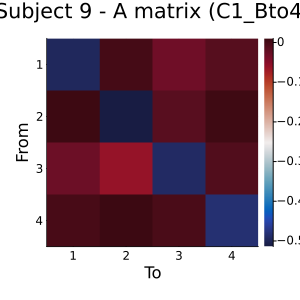

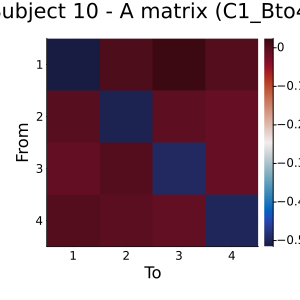

Model: C14_Bbi


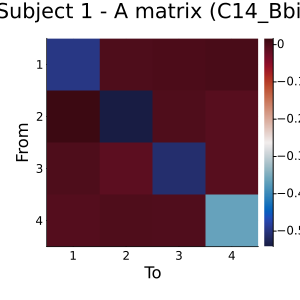

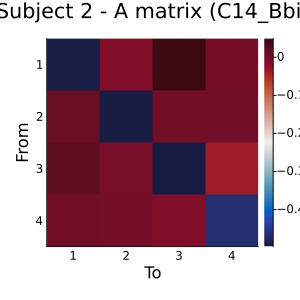

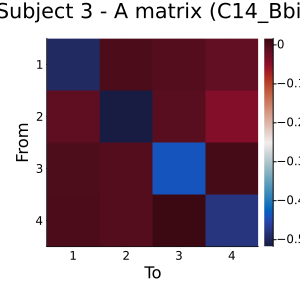

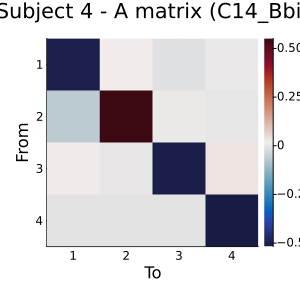

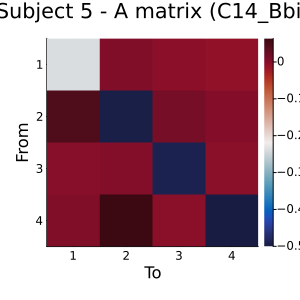

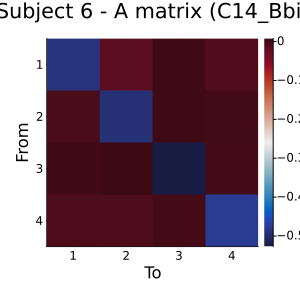

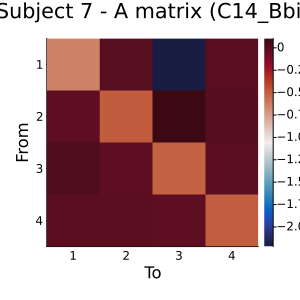

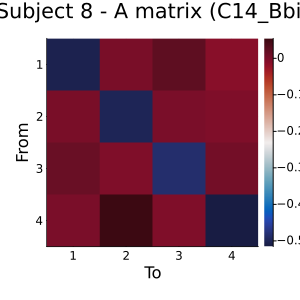

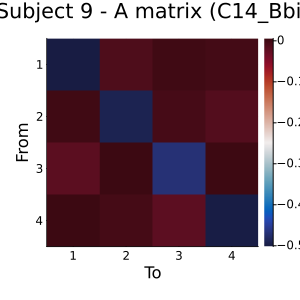

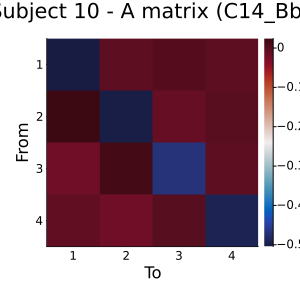

Model: Bto4_only


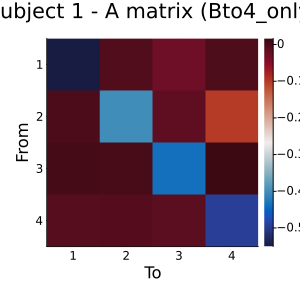

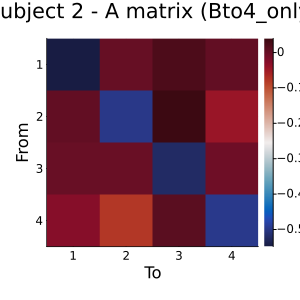

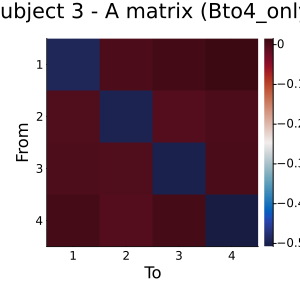

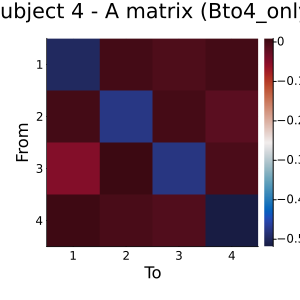

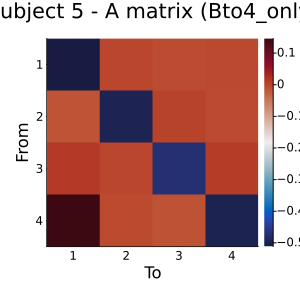

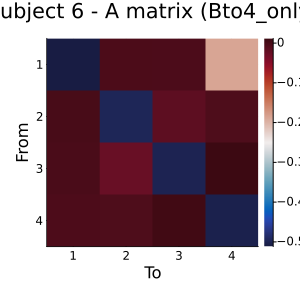

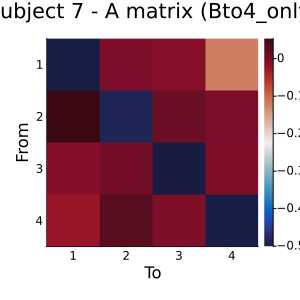

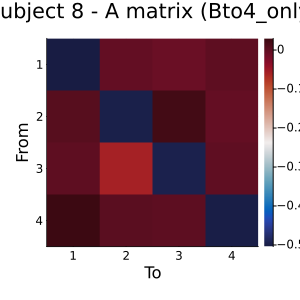

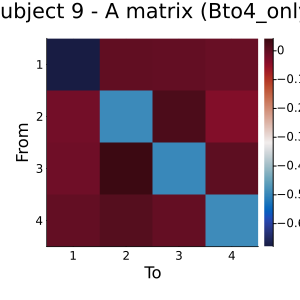

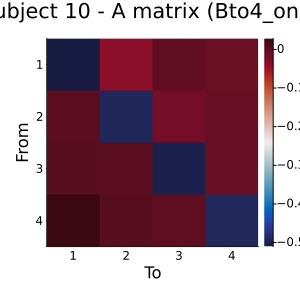

Model: Bto1_only


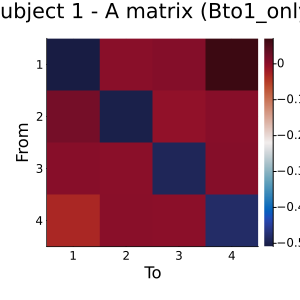

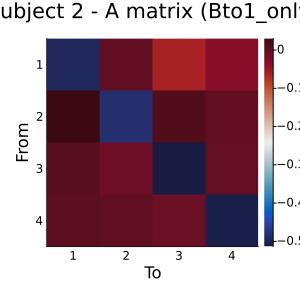

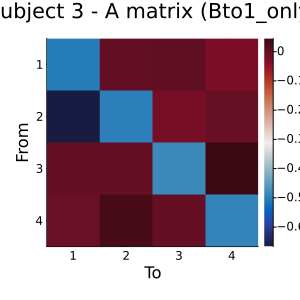

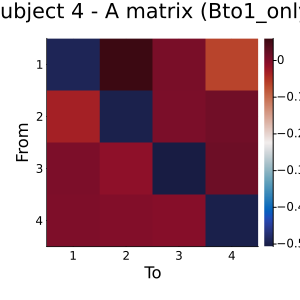

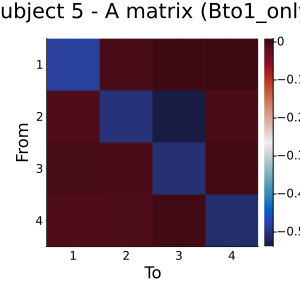

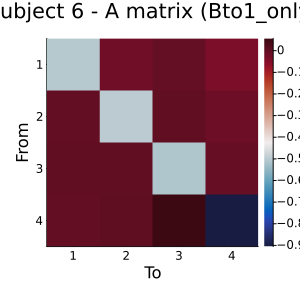

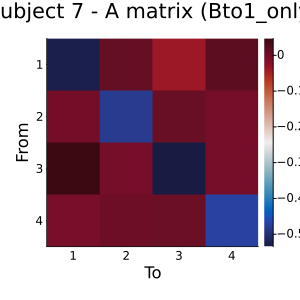

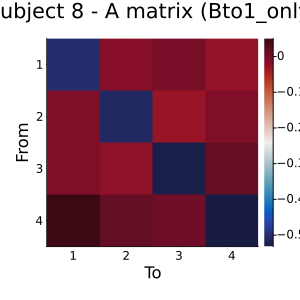

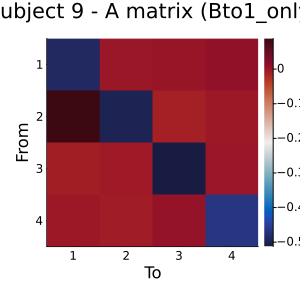

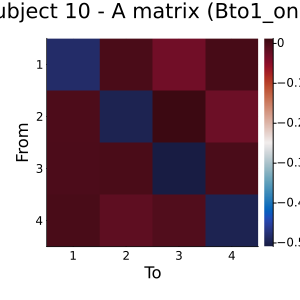

Model: Null


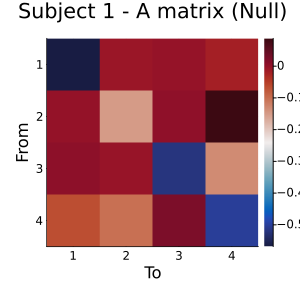

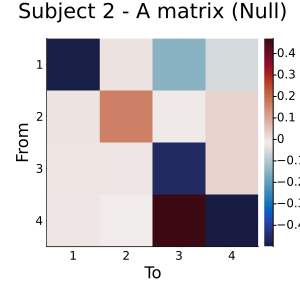

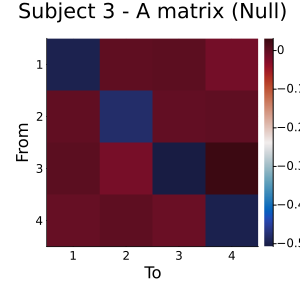

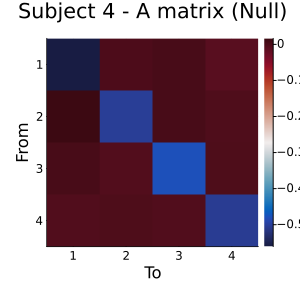

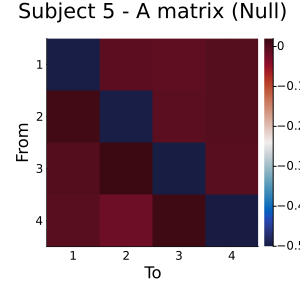

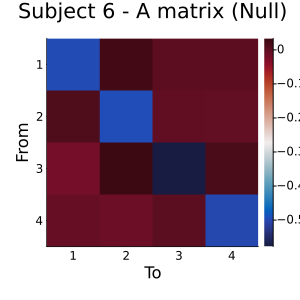

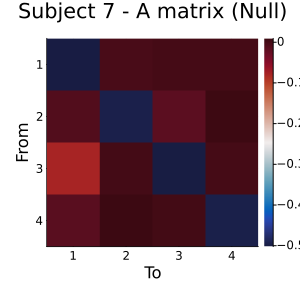

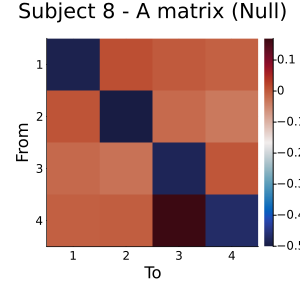

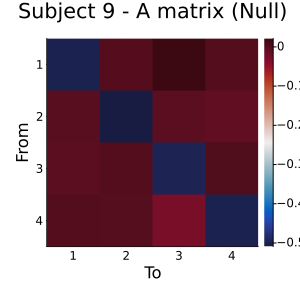

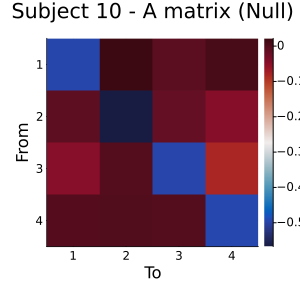

In [529]:
# Visualize A matrices per subject
for model in keys(θ_estimates)
    println("Model: ", model)
    for (i, θ) in enumerate(θ_estimates[model])
        A, _, _, _, _ = VBInfer.unpack_params(θ, n, occursin("B", String(model)))
        A = Float64.(A)
        heatmap(A, title="Subject $i - A matrix ($model)", xlabel="To", ylabel="From", c=:balance, size=(300,300),yflip=true)
        display(current())
    end
end

In [530]:
# Posterior probabilities
posterior_probs = GroupInference.compare_models(free_energies)
println("Posterior model probabilities (rows=subjects, cols=models):\n", posterior_probs)


Posterior model probabilities (rows=subjects, cols=models):
[1.8497841607017186e-43 1.4593547057972934e-81 0.0 0.9989206418614608 0.0010793581385043238 3.475552755114742e-14 0.0 1.2893227322510787e-42; 1.2140809480101745e-28 2.2915719895055683e-6 2.1612875234782703e-34 2.87410239277013e-39 0.9999977084280105 3.721062595207043e-49 1.6537235545955724e-188 2.3002069877702196e-108; 1.519686626767664e-12 7.286504716477012e-64 1.5925819300840728e-113 8.994775861185136e-29 2.009017132789262e-16 5.975199450161484e-77 1.713659398503118e-174 0.9999999999984801; 3.3878886236941243e-40 1.8041899382539398e-18 4.902494578133341e-63 8.693347709129873e-84 4.832272248603889e-170 1.0 8.997228037123293e-55 1.0542983495797224e-42; 5.69444636897443e-82 1.6557622106308273e-33 2.925401175764884e-112 1.0 8.439759210354299e-182 2.786859504693954e-125 9.139637586527781e-177 7.353994107062103e-20; 5.586245014455756e-116 1.1527543831198583e-124 2.023136463542132e-66 5.758489159921034e-217 4.589413721143266e-130 1

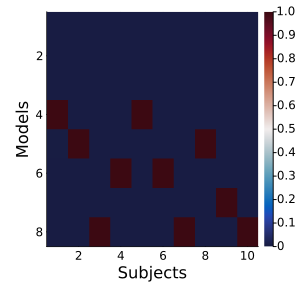

In [553]:
heatmap(posterior_probs', xlabel="Subjects", ylabel="Models", c=:balance, size=(300,300), yflip=true)

In [554]:
# Summary: model selection per subject
for i in 1:n_subjects
    best_idx = argmax(posterior_probs[i, :])
    println("Subject $i best model: ", model_names[best_idx])
end

Subject 1 best model: C4_Bto1
Subject 2 best model: C14_Bbi
Subject 3 best model: Null
Subject 4 best model: Bto4_only
Subject 5 best model: C4_Bto1
Subject 6 best model: Bto4_only
Subject 7 best model: Null
Subject 8 best model: C14_Bbi
Subject 9 best model: Bto1_only
Subject 10 best model: Null


In [555]:
println("BEST MODEL (max posterior prob): ",model_names[best_model_index[2]])

BEST MODEL (max posterior prob): C1_only


## Save - Load

In [351]:
df_fe = DataFrame(Subject = 1:n_subjects)
for m in model_names
    df_fe[!, Symbol(m)] = free_energies[m]
end
CSV.write("outputs/$test/free_energies.csv", df_fe)

"outputs/Parc4_all-blocks_ses1_n10/free_energies.csv"

In [352]:
df_params = DataFrame(Subject = 1:n_subjects)
for m in model_names
    df_params[!, Symbol(m)] = θ_estimates[m]
end
CSV.write("outputs/$test/theta_params.csv", df_params)

"outputs/Parc4_all-blocks_ses1_n10/theta_params.csv"

In [353]:
df_post = DataFrame(Subject = 1:n_subjects)
for (i, m) in enumerate(model_names)
    df_post[!, Symbol(m)] = posterior_probs[:, i]
end
CSV.write("outputs/$test/posterior_probs.csv", df_post)

"outputs/Parc4_all-blocks_ses1_n10/posterior_probs.csv"

In [ ]:
df = CSV.read("outputs/$test/free_energies.csv", DataFrame)
free_energies = Dict(col => df[!, col] for col in names(df))

df = CSV.read("outputs/$test/theta_params.csv", DataFrame)
θ_estimates = Dict(col => df[!, col] for col in names(df))

df = CSV.read("outputs/$test/posterior_probs.csv", DataFrame)
posterior_probs = Dict(col => df[!, col] for col in names(df))


In [355]:
best_params = Dict()

for i in 1:n_subjects
    best_idx = argmax(posterior_probs[i, :])
    best_model = model_names[best_idx]
    θ = θ_estimates[best_model][i]
    A, B, C, τ, α = VBInfer.unpack_params(θ, n, best_model in [:C1_Bto4, :C4_Bto1, :C14_Bbi])
    best_params["subject_$i"] = Dict(
        "model" => String(best_model),
        "A" => A,
        "B" => B,
        "C" => C,
        "tau" => τ,
        "alpha" => α
    )
end

open("outputs/$test/best_model_params.json", "w") do io
    JSON.print(io, best_params)
end

In [534]:
θ_estimates

Dict{Symbol, Vector{Any}} with 8 entries:
  :C4_Bto1   => [[-0.51242, -0.00213275, -0.000795862, 0.0287479, 0.00162363, -…
  :C1_only   => [[-0.514487, -0.0137314, 0.0426909, -0.00495591, 0.00562958, -0…
  :C4_only   => [[-0.502225, 2.54848, 0.00667167, -0.000756959, -0.0101331, -0.…
  :C1_Bto4   => [[-0.507448, 0.00112188, 0.00364786, -0.0132904, -0.00820877, -…
  :C14_Bbi   => [[-0.497898, 0.0165492, 0.00113977, -0.00418792, 0.00108345, -0…
  :Bto4_only => [[-0.550634, 0.0027138, 0.00854916, -0.00611138, -0.00250132, -…
  :Bto1_only => [[-0.508982, 0.0214543, 0.00614353, -0.0304267, 0.00357076, -0.…
  :Null      => [[-0.568457, 0.00101165, 0.00791643, -0.0646405, -0.00624236, -…

In [557]:
best_thetas = [
    θ_estimates[model_names[argmax(posterior_probs[i, :])]][i]
    for i in 1:n_subjects
]
θs = hcat(best_thetas...)'  # size: (n_subjects, n_params)


10×44 adjoint(::Matrix{Float64}) with eltype Float64:
 -0.498762   0.0783956    0.000681044  …  0.221953  0.332633  0.323638
 -0.498519   0.0783415    0.00432947      0.329465  0.323638  0.332634
 -0.496905  -0.0218497   -0.113841        0.332309  0.315552  0.336536
 -0.498487   0.00219736   0.0598387       0.335627  0.332943  0.331949
 -0.607351   0.00332399   2.04918         0.298485  0.325735  0.334339
 -0.497358   0.0153142   -0.00672434   …  0.332551  0.325807  0.306092
 -0.495956  -0.00522749   0.00275805      0.329834  0.317554  0.330824
 -0.502747   0.00894599  -0.0176147       0.33285   0.334068  0.334128
 -0.511985  -0.00691798  -0.0339752       0.347184  0.330054  0.322551
 -0.487536   0.011072     0.00169285      0.32405   0.32401   0.334417

In [558]:
# Group-level PEB  on best model (e.g. :C_and_B)
μ, σ² = GroupInference.run_peb(θs)

keep_mask = σ²[:] .> 1e-6
μ_filtered = μ[keep_mask]
σ²_filtered = σ²[keep_mask]
labels_filtered = labels[keep_mask]

44-element Vector{String}:
 "A11"
 "A21"
 "A31"
 "A41"
 "A12"
 "A22"
 "A32"
 "A42"
 "A13"
 "A23"
 "A33"
 "A43"
 "A14"
 ⋮
 "C1"
 "C2"
 "C3"
 "C4"
 "tau1"
 "tau2"
 "tau3"
 "tau4"
 "alpha1"
 "alpha2"
 "alpha3"
 "alpha4"

In [559]:
# Group-level : BMR on best model (e.g. :C_and_B)
best_mask = GroupInference.run_bmr_greedy(μ_filtered, σ²_filtered, labels_filtered,λ=1e-2)

Initial Free Energy: -9566.6479465023
Step 1: Removing param tau4 → FE improved to -5763.19688559719
Step 2: Removing param tau2 → FE improved to -4181.623631759507
Step 3: Removing param alpha3 → FE improved to -2869.2715202756362
Step 4: Removing param A33 → FE improved to -1834.4689566583224
Step 5: Removing param A22 → FE improved to -1061.1248546174957
Step 6: Removing param alpha4 → FE improved to -426.39174101940733
Step 7: Removing param alpha1 → FE improved to -101.84986001322362
Step 8: Removing param A11 → FE improved to 1.455264785162782
Step 9: Removing param tau1 → FE improved to 42.76364889776631
Step 10: Removing param alpha2 → FE improved to 78.41231191924635


44-element BitVector:
 0
 1
 1
 1
 1
 0
 1
 1
 1
 1
 0
 1
 1
 ⋮
 1
 1
 1
 1
 0
 0
 1
 0
 0
 0
 0
 0

In [560]:
println("Retained parameters (BMR):")
for (i, keep) in enumerate(best_mask)
    if keep
        println("✓ ", labels[i])
    end
end

Retained parameters (BMR):
✓ A21
✓ A31
✓ A41
✓ A12
✓ A32
✓ A42
✓ A13
✓ A23
✓ A43
✓ A14
✓ A24
✓ A34
✓ A44
✓ B11
✓ B21
✓ B31
✓ B41
✓ B12
✓ B22
✓ B32
✓ B42
✓ B13
✓ B23
✓ B33
✓ B43
✓ B14
✓ B24
✓ B34
✓ B44
✓ C1
✓ C2
✓ C3
✓ C4
✓ tau3


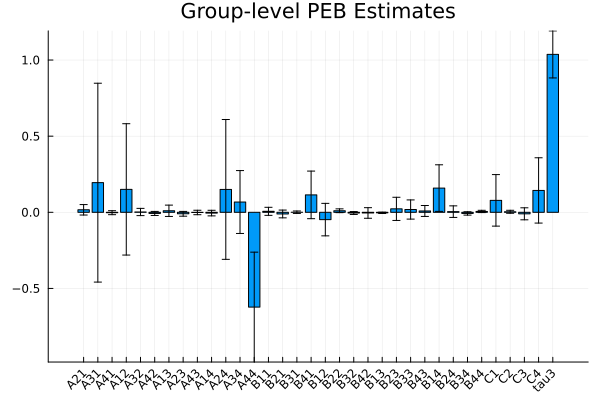

In [561]:
μ = μ[:]
σ = sqrt.(σ²[:])
bar(labels[best_mask], μ[best_mask]; yerror=σ[best_mask], title="Group-level PEB Estimates", legend=false, xticks=:all, xrotation=45)

In [562]:
μ[1:16]

16-element Vector{Float64}:
 -0.5095605692517939
  0.01635954772478146
  0.1946326270500835
 -0.0025991017952443638
  0.15046018110384293
 -0.49761552838130435
  0.0019463357750344093
 -0.007540652750986305
  0.00989325537563249
 -0.009902166420287038
 -0.49744497305366925
 -0.001226172734323264
 -0.005204198282154628
  0.15015336522856246
  0.06743774094493869
 -0.6226832752175133

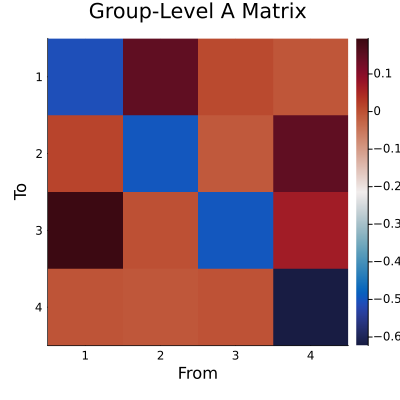

In [563]:
A, B, C, τ, α = VBInfer.unpack_params(μ[:], n, true)
PlotUtils.plot_matrix_heatmap(A, "Group-Level A Matrix",)


In [564]:
A

4×4 Matrix{Float64}:
 -0.509561    0.15046      0.00989326  -0.0052042
  0.0163595  -0.497616    -0.00990217   0.150153
  0.194633    0.00194634  -0.497445     0.0674377
 -0.0025991  -0.00754065  -0.00122617  -0.622683

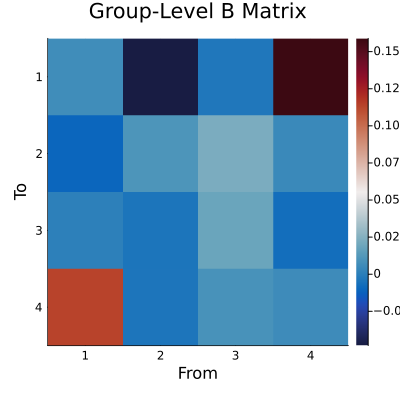

In [565]:
PlotUtils.plot_matrix_heatmap(B, "Group-Level B Matrix")

In [566]:
B

4×4 Matrix{Float64}:
  0.00629831   -0.0480519   -0.00355592   0.158909
 -0.0109616     0.0100982    0.0225128    0.00427187
  0.000485045  -0.00473386   0.0182553   -0.00753691
  0.114307     -0.0044853    0.00868057   0.00554321

In [365]:
npzwrite("outputs/$test/A_group.npy", A)
npzwrite("outputs/$test/B_group.npy", B)
npzwrite("outputs/$test/C_group.npy", C)
npzwrite("outputs/$test/τ_group.npy", τ)
npzwrite("outputs/$test/α_group.npy", α)

# Simulate

In [567]:
y_obs = npzread("/media/RCPNAS/Data3/Ilaria/TS_data/brain_spine_E_dcm/Parc8_all-emb/ses2/sub-6.npy")
task = task_inputs[6]
T = size(y_obs, 1)
tvec = collect(0:TR:(T-1)*TR)
u_func = DCMRealData.make_input_function(task, tvec)

#1 (generic function with 1 method)

In [568]:
fitted_params = (; A=A, B=B, C=C, τ=τ, α=α, e₀=fill(0.34, n), n_regions=n, u=u_func)

(A = [-0.5095605692517939 0.15046018110384293 0.00989325537563249 -0.005204198282154628; 0.01635954772478146 -0.49761552838130435 -0.009902166420287038 0.15015336522856246; 0.1946326270500835 0.0019463357750344093 -0.49744497305366925 0.06743774094493869; -0.0025991017952443638 -0.007540652750986305 -0.001226172734323264 -0.6226832752175133], B = [0.006298305534387866 -0.04805187344635016 -0.003555918425246991 0.15890938226805681; -0.010961617044298507 0.010098249560343713 0.022512788731767847 0.0042718719654768885; 0.00048504496173344116 -0.004733860517877686 0.01825534440209973 -0.007536910728307034; 0.11430669577063732 -0.004485303222718526 0.00868056595767531 0.005543211083467556], C = [0.0783926917956639, 0.003337145027488038, -0.009958717018299777, 0.1436339029388231], τ = [1.0043307229630545, 0.981878255985707, 1.0370191390071204, 0.988267034959943], α = [0.32944730449044296, 0.3184308165321416, 0.3261992993178531, 0.328710874240156], e₀ = [0.34, 0.34, 0.34, 0.34], n_regions = 4

In [569]:
function simulate_dcm_with_noise(params, t; σ_noise=1)
    bold_clean = DCMRealData.simulate_dcm(params, t)
    noise = σ_noise .* randn(size(bold_clean))
    return bold_clean + noise
end

simulate_dcm_with_noise (generic function with 1 method)

In [570]:
bold_sim = simulate_dcm_with_noise(fitted_params, tvec)


8×4 Matrix{Float64}:
 -0.305053    0.461005  0.368663   0.467364
  1.22509     0.86572   0.231281   0.0490118
  0.0404438  -0.14324   1.52072    2.43865
 -0.0275185  -0.269388  1.19306   -1.24476
  1.62614     1.75607   0.307734   0.939905
  1.18649     1.30488   1.63778   -0.311356
  0.128639   -0.311142  0.528251   3.69017
 -0.93469     0.647895  0.570803   0.588636

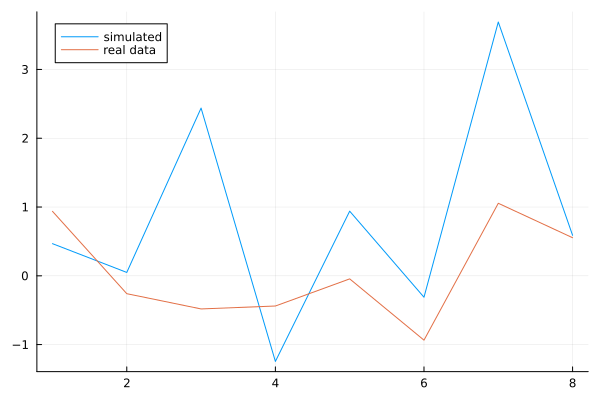

In [571]:
roi = 4
bold_obs = y_obs

plot(bold_sim[:,roi], label="simulated")
plot!(bold_obs[:,roi], label="real data")

In [572]:
size(bold_sim)

(8, 4)

In [573]:
rmse = sqrt(mean((bold_obs .- bold_sim).^2))


LoadError: DimensionMismatch("arrays could not be broadcast to a common size; got a dimension with lengths 239 and 4")

# Check stability for BMR : 
## however, the problem was at the subject level so this no need to include

In [61]:
function plot_bmr_stability(freq::Vector{Float64}, labels::Vector{String})
    bar(
        labels,
        freq,
        xlabel="Parameter",
        ylabel="Retention Frequency",
        title="BMR Stability Across Runs",
        ylim=(0, 1),
        legend=false,
        rotation=90,
        size=(100+20*length(labels),400)
    )
end

plot_bmr_stability (generic function with 1 method)

In [48]:
μ_vec = vec(μ)
σ²_vec = vec(σ²)
ret_freq = GroupInference.bmr_stability_analysis(μ_vec,σ²_vec,labels)

Initial Free Energy: -107629.87512585142
Step 1: Removing param tau1 → FE improved to -63799.18524372049
Step 2: Removing param tau3 → FE improved to -23363.895250776808
Step 3: Removing param tau4 → FE improved to -11046.882263579078
Step 4: Removing param tau2 → FE improved to -4022.303186206606
Step 5: Removing param alpha1 → FE improved to -2918.459820583583
Step 6: Removing param A33 → FE improved to -2055.096885423664
Step 7: Removing param A44 → FE improved to -1353.3094538196433
Step 8: Removing param alpha3 → FE improved to -691.2274044741636
Step 9: Removing param alpha2 → FE improved to -431.32181688483126
Step 10: Removing param A22 → FE improved to -224.01953950635212
Initial Free Energy: -107629.87512585142
Step 1: Removing param tau1 → FE improved to -63799.18524372049
Step 2: Removing param tau3 → FE improved to -23363.895250776808
Step 3: Removing param tau4 → FE improved to -11046.882263579078
Step 4: Removing param tau2 → FE improved to -4022.303186206606
Step 5: Rem

44-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0
 0.0
 1.0
 1.0
 1.0
 1.0
 0.0
 1.0
 1.0
 ⋮
 1.0
 1.0
 1.0
 1.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 1.0

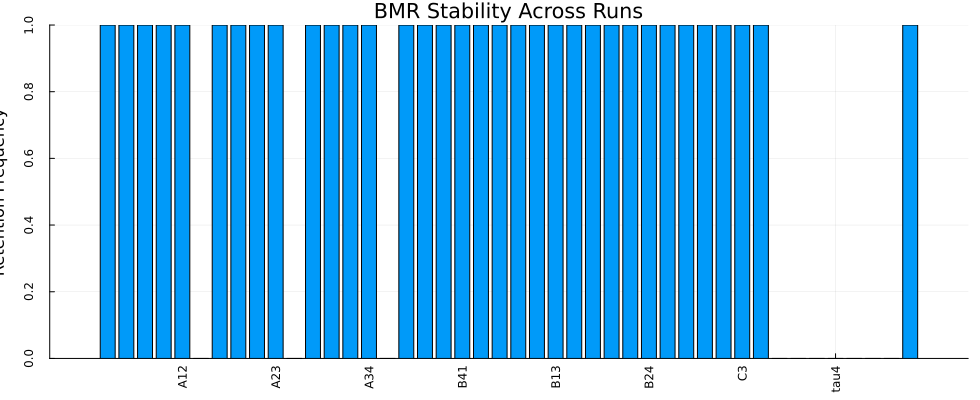

In [62]:
plot_bmr_stability(ret_freq,labels)

LoadError: MethodError: no method matching isless(::Float64, ::Vector{Float64})
[0mClosest candidates are:
[0m  isless(::T, [91m::T[39m) where T<:Union{Float16, Float32, Float64} at ~/bin/julia-1.7.2/share/julia/base/float.jl:460
[0m  isless([91m::AbstractVector[39m, ::AbstractVector) at ~/bin/julia-1.7.2/share/julia/base/abstractarray.jl:2532
[0m  isless(::Real, [91m::Static.StaticInteger{Y}[39m) where Y at ~/.julia/packages/Static/IYKUj/src/Static.jl:466
[0m  ...

# HRF per subject

In [105]:
α_list

5-element Vector{Vector{Float64}}:
 [-0.0084061141499796, 0.0030012106675288463, -0.01475090550846301, 0.0234150714344435]
 [0.31886702445226367, 0.3683749803395219, 0.3371526010212122, 0.11077919087322338]
 [-0.003518812986177013, 0.005162547442740439, 2.6052911294834448e-5, -0.008791992078993291]
 [0.0017832849729297205, -0.004062423584824176, 0.008523183246943625, 0.004788296375346362]
 [0.33531523716332334, 0.32804036356397165, 0.3359345657941259, 0.32336745570586845]

In [101]:
τ_list = Vector{Vector{Float64}}()
α_list = Vector{Vector{Float64}}()

for i in 1:n_subjects
    best_model_idx = argmax(posterior_probs[i, :])
    best_model = model_names[best_model_idx]
    θ = θ_estimates[best_model][i]
    _, _, _, τ, α = VBInfer.unpack_params(θ, n, best_model in [:C1_Bto4, :C4_Bto1, :C14_Bbi])
    push!(τ_list, τ)
    push!(α_list, α)
end

In [108]:
# Plot distributions of τ and α across subjects
function plot_hrf_params(τ_list::Vector{Vector{Float64}}, α_list::Vector{Vector{Float64}})
    n = length(τ_list[1])
    τ_mat = hcat(τ_list...)'  # (subjects, regions)
    α_mat = hcat(α_list...)'

    # τ plots
    p1 = plot(layout=(1,n), size=(200*n, 200), title="τ distributions across subjects")
    for i in 1:n
        histogram!(p1[i], τ_mat[:, i], bins=10, label="", xlabel="τ[$i]")
    end

    # α plots
    p2 = plot(layout=(1,n), size=(200*n, 200), title="α distributions across subjects")
    for i in 1:n
        histogram!(p2[i], α_mat[:, i], bins=10, label="", xlabel="α[$i]")
    end

    display(p1)
    display(p2)
end

plot_hrf_params (generic function with 1 method)

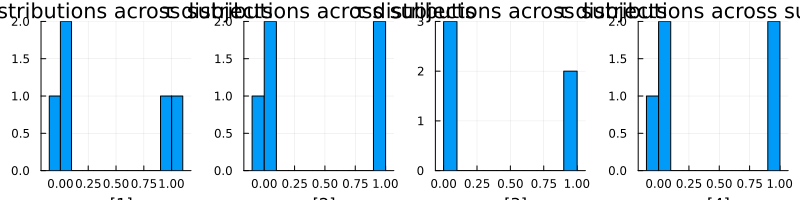

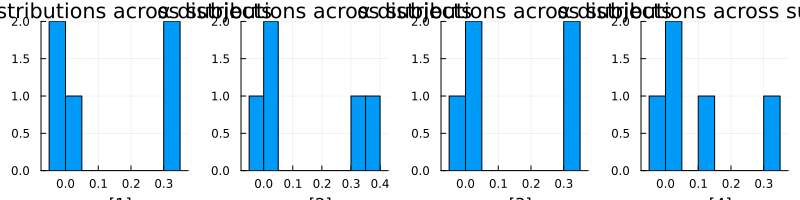

In [109]:
plot_hrf_params(τ_list,α_list)

In [370]:
function generate_hrf_curve(τ::Float64, α::Float64, e₀::Float64=0.34; T=30.0, dt=0.1)

    tspan = (0.0, T)
    t = 0:dt:T

    function balloon!(du, u, p, t)
        s, f, v, q = u
        z = (t < 0.1) ? 1.0 : 0.0

        # Avoid instability
        f = max(f, 1e-4)
        v = max(v, 1e-4)

        du[1] = z - τ * s - f + 1
        du[2] = s
        du[3] = (f - v^(1/α)) / τ
        du[4] = ((f * (1 - (1 - e₀)^(1/f)) / e₀) - q * v^(1/α - 1)) / τ
    end

    u0 = [0.0, 1.0, 1.0, 1.0]
    prob = ODEProblem(balloon!, u0, tspan)
    sol = solve(prob, Tsit5(); saveat=t, abstol=1e-8, reltol=1e-6)

    s, f, v, q = sol[1,:], sol[2,:], sol[3,:], sol[4,:]

    y = 0.02 .* (7 * e₀ .* (1 .- q) .+ 2 .* (1 .- q ./ v) .- 0.2 .* (1 .- v))
    return t, y
end


generate_hrf_curve (generic function with 2 methods)

In [124]:
τ_list

5-element Vector{Vector{Float64}}:
 [0.0240495210424531, 0.020920356571770382, 0.05340944307139967, 0.002082966102788465]
 [0.9827566096687508, 0.9593192897486802, 0.9815681775948824, 0.9820294496442274]
 [0.009357786518501764, -0.001894992868972838, 0.010968016842443144, -0.006470030509496596]
 [-0.0005444224681329854, 0.009114820634426257, 0.0035482986175584385, 0.0038475605454032632]
 [1.0023594729795253, 0.9778970487507154, 0.980038629519489, 0.9798286179735123]

In [125]:
α_list

5-element Vector{Vector{Float64}}:
 [-0.0084061141499796, 0.0030012106675288463, -0.01475090550846301, 0.0234150714344435]
 [0.31886702445226367, 0.3683749803395219, 0.3371526010212122, 0.11077919087322338]
 [-0.003518812986177013, 0.005162547442740439, 2.6052911294834448e-5, -0.008791992078993291]
 [0.0017832849729297205, -0.004062423584824176, 0.008523183246943625, 0.004788296375346362]
 [0.33531523716332334, 0.32804036356397165, 0.3359345657941259, 0.32336745570586845]

In [143]:
τ_indices = 2n^2 + n + 1 : 2n^2 + n + n     # τ
α_indices = 2n^2 + 2n + 1 : size(μ)[1]            # α

τ_group = μ[τ_indices]
α_group = μ[α_indices]


4-element Vector{Float64}:
 0.327396914593859
 0.34078106063441505
 0.3298273550291212
 0.2854520910883621

In [368]:
α_group = α
τ_group = τ

4-element Vector{Float64}:
 0.9734972415398419
 0.9793022854552744
 0.9737985981588488
 0.9867807332284324

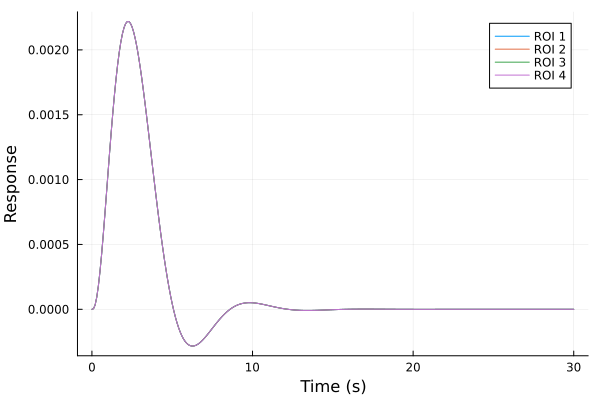

In [374]:
subid = 1
#τ_group = τ_list[subid]
#α_group = α_list[subid]

# for i in 1:n
#     t, hrf = generate_hrf_curve(τ_group[i], α_group[i])
#     p1 = plot(t, hrf, label="ROI $i", xlabel="Time (s)", ylabel="BOLD signal", title="HRF per ROI")
#     display(p1)
# end

t1, hrf1 = generate_hrf_curve(τ_group[1], α_group[1])
t2, hrf2 = generate_hrf_curve(τ_group[2], α_group[2])
t3, hrf3 = generate_hrf_curve(τ_group[3], α_group[3])
t4, hrf4 = generate_hrf_curve(τ_group[4], α_group[1])

plot(t1, hrf1,label="ROI 1")
plot!(t1, hrf1,label="ROI 2")
plot!(t1, hrf1,label="ROI 3")
plot!(t1, hrf1,label="ROI 4")
                

    
xlabel!("Time (s)")
ylabel!("Response")

In [375]:
α_group

4-element Vector{Float64}:
 0.32819019306118197
 0.32928354045983843
 0.30375128635104887
 0.34438317562788734

In [376]:
τ_group

4-element Vector{Float64}:
 0.9734972415398419
 0.9793022854552744
 0.9737985981588488
 0.9867807332284324

4-element Vector{Float64}:
 1.017514885494284
 0.985146107550839
 0.9528195038871281
 0.9820264094054469

In [139]:
size( μ)[1]

44